<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=6>Ensemble Techniques</center></font></h1>
<h1><center>Travel Purchase Plan Prediction</center></h1>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Panoramic_view_of_the_old_city_of_Dubrovnik_-_September_2017.jpg" width="300" height="100"/></center>


## Problem Statement

### Background and Context:

"Visit with us" is a toursim company and the Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages.However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. This time company wants to harness the available data of existing and potential customers to target the right customers.

### Objective:
To predict which customer is more likely to purchase the newly introduced travel package.

As a Data Scientist at "Visit with us" travel company, the task is to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

- What are the different factors which affect the target variable? What business recommendations can we give based on the analysis?
- How can we use different ensemble techniques - Bagging, Boosting, and Stacking to build a model to predict the potential customer who is going to purchase the newly introduced travel package?

### Data Description:

### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer


### ***Key Questions to be answered***

The following questions to be worked upon while analyzing the data and for building model using Ensemble Techniques:


1.  Understanding of the data and its columns- Check for the data types, missing values, outliers, transformation of variables to provide insights on the problem statement
2.  Analysis of Data to derive the factors involved in the prediction
1.  Build Models using the Ensemble Techniques (Bagging/Boosting algorithms) 
2.  Insights and Recommendations

## Importing necessary libraries

**Let's start by importing libraries we need.**

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree

## Reading the dataset

In [4]:
# read the dataset
url = 'https://raw.githubusercontent.com/Seprishi/EnsembleTechniques/main/Projects/Tourism.csv'
data = pd.read_csv(url)

In [5]:
# copying data to another varaible to avoid any changes to original data
df=data.copy()

## Overview of the dataset

***View the first 5 rows of the dataset***

In [6]:
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

***View the last 5 rows of the dataset***

In [7]:
data.tail()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

### Check data types and number of non-null values for each column

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
data.shape

(4888, 20)

###Observations
- We can see that there are total of 20 columns and 4,888 rows in the dataset.
- Data has a mix of Int, float and Object data types.
- There are some null values in few of the columns which needs treatment
- ProdTaken is the Target variable and It has no missing values
- TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation are object type columns but contain categorical information. We need to convert these columns to Category type.
- PreferredPropertyStar, NumberOfChildrenVisiting, NumberOfPersonVisiting, PitchSatisfactionScore, NumberOfFollowups, OwnCar, Passport, CityTier and ProdTaken are numerical columns but contain categorical information. We will covert these columns also to Category type

In [10]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Data Preprocessing

 ***Data conversion to Categorical Data type***

In [11]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   
5      200005          0  32.0  Company Invited         1              8.0   
6      200006          0  59.0     Self Enquiry         1              9.0   
7      200007          0  30.0     Self Enquiry         1             30.0   
8      200008          0  38.0  Company Invited         1             29.0   
9      200009          0  36.0     Self Enquiry         1             33.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   
5        Salaried    Male                       3                3.0   
6  Small Business  Female                       2                2.0   
7        Salaried    Male                       3                3.0   
8        Salaried    Male                       2                4.0   
9  Small Business    Male                       3                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   
5          Basic                    3.0        Single            1.0   
6          Basic                    5.0      Divorced            5.0   
7          Basic                    3.0       Married            2.0   
8       Standard                    3.0     Unmarried            1.0   
9         Deluxe                    3.0      Divorced            7.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   
5         0                       5       1                       1.0   
6         1                       2       1                       1.0   
7         0                       2       0                       1.0   
8         0                       3       0                       0.0   
9         0                       3       1                       0.0   

      Designation  MonthlyIncome  
0         Manager        20993.0  
1         Manager        20130.0  
2       Executive        17090.0  
3       Executive        17909.0  
4       Executive        18468.0  
5       Executive        18068.0  
6       Executive        17670.0  
7       Executive        17693.0  
8  Senior Manager        24526.0  
9         Manager        20237.0

In [12]:
# creating list of category columns that are not object type
cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","Passport","PitchSatisfactionScore","OwnCar"]
data[cat_cols] = data[cat_cols].astype("category")

# selecting all object datatypes and converting to category
cols = data.select_dtypes(["object"])
for i in cols.columns:
    data[i] = data[i].astype("category")

# check the dataset for updated datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [13]:
data['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [14]:
cat_cols1 = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus', 'PreferredPropertyStar',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
for column in cat_cols1:
    print('-'*30)
    print(data[column].value_counts())
    print('-'*30)

------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
------------------------------
------------------------------
0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
------------------------------
1    3032
0    1856
Name: OwnCar, dtype: int64
------------------------------
------------------------------
0    3466
1    1422
Name: Passport, dtype: int64
------------------------------
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
------------------------------
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
------------------------------
------------------------------

***Observation***
- From the data, it is inferred that customers are prefering 3 star property for stay
- Majority of the customers are married and there is a category of single and unmarried indicating bachelors and customers in relationship. Hence, we can keep them as is
- In gender, there are 2 categories Female and Fe Male which can be merged
- Most of the enquiries made to the company are self-enquiry
- Tier 1 City customers are willing to go for travel

***Merging of Entries***

In [15]:
data['Gender'] = data['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)
data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

***Missing Value Treatment***

In [16]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

***Observation***


- Designation of a customer is related with Age and Monthly Income. There are no missing values in Designation. Hence, it can act as a basis to update the missing values in Age and MonthlyIncome.
- NumberOfChildrenVisiting, NumberOfTrips, PreferredPropertyStar, NumberOfFollowups, DurationOfPitch can be populated with Median values of the column.
- Data impute based on the available information to be done for Type of Contact column

In [17]:
# replace the missing values with median income w.r.t the customer"s designation
data["MonthlyIncome"] = data.groupby(["Designation"])["MonthlyIncome"].transform(lambda x: x.fillna(x.median()))
data["Age"] = data.groupby(["Designation"])["Age"].transform(lambda x: x.fillna(x.median()))

In [18]:
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].transform(lambda x: x.fillna(x.median()))
data["NumberOfTrips"] = data["NumberOfTrips"].transform(lambda x: x.fillna(x.median()))
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].transform(lambda x: x.fillna(x.median()))
data["NumberOfFollowups"] = data["NumberOfFollowups"].transform(lambda x: x.fillna(x.median()))
data["DurationOfPitch"] = data["DurationOfPitch"].transform(lambda x: x.fillna(x.median()))


In [19]:
# treating missing values in remaining categorical variables
data["TypeofContact"] = df["TypeofContact"].fillna("Self Enquiry")

In [20]:
data.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

***Observation***
- No Missing values in the data as all the columns are treated

### Summary of the dataset

In [21]:
# Summary of continuous columns
data.describe().T

count           mean          std       min  \
CustomerID                4888.0  202443.500000  1411.188388  200000.0   
Age                       4888.0      37.429828     9.149822      18.0   
DurationOfPitch           4888.0      15.362930     8.316166       5.0   
NumberOfFollowups         4888.0       3.711129     0.998271       1.0   
PreferredPropertyStar     4888.0       3.577946     0.797005       3.0   
NumberOfTrips             4888.0       3.229746     1.822769       1.0   
NumberOfChildrenVisiting  4888.0       1.184738     0.852323       0.0   
MonthlyIncome             4888.0   23546.843903  5266.279293    1000.0   

                                25%       50%        75%       max  
CustomerID                201221.75  202443.5  203665.25  204887.0  
Age                           31.00      36.0      43.00      61.0  
DurationOfPitch                9.00      13.0      19.00     127.0  
NumberOfFollowups              3.00       4.0       4.00       6.0  
PreferredPropertyStar          3.00       3.0       4.00       5.0  
NumberOfTrips                  2.00       3.0       4.00      22.0  
NumberOfChildrenVisiting       1.00       1.0       2.00       3.0  
MonthlyIncome              20485.00   22413.5   25424.75   98678.0

In [22]:
# summary of categorical columns
data.describe(include="category").T

count unique        top  freq
ProdTaken               4888      2          0  3968
CityTier                4888      3          1  3190
Occupation              4888      4   Salaried  2368
NumberOfPersonVisiting  4888      5          3  2402
ProductPitched          4888      5      Basic  1842
MaritalStatus           4888      4    Married  2340
Passport                4888      2          0  3466
PitchSatisfactionScore  4888      5          3  1478
OwnCar                  4888      2          1  3032
Designation             4888      5  Executive  1842

***Observations***

- The min Age is 18 and 50% of the customers are under the age 36 and 75% of them are under 44. Significantly, this could be a driving factor for the tourism
- The Average income is 22347 and 75% of them are having a monthly income of 25571. However the max value is 98678 which is way outside the majority of the population.
- The number of followups are on an average of 4 times
- The number of children visiting the trip on an average is 1
- The duration of pitch is sales person varies from 5 to 20 min for 75% of the customers
- The top pick on the Products pitched to the customer is BASIC
-  Mostly Executives prefer the travel purchase plans
- Salaried class is more inclined towards the travel
- Self Enquiry is the top mode of contact from the customers
- Customers who owns car are willing to go for the travel
- Tier 1 customers are preferring the travel compared to the other tier cities
- 3 persons are going/ taking them for travel as per the data

***More analysis on Age and Monthly Income***

- Age is an important column and can be modified to have bins so that we can check if any pattern is there on the travel plans made.
- Monthly income also needs to understand better to derive pattern and conclusion

In [23]:
data['Agebin'] = pd.cut(data['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [24]:
data.Agebin.value_counts()

31-40    1948
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

In [26]:
data.MonthlyIncome.describe()

count     4888.000000
mean     23546.843903
std       5266.279293
min       1000.000000
25%      20485.000000
50%      22413.500000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [25]:
data['Incomebin'] = pd.cut(data['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [69]:
data.Incomebin.value_counts()

<25000     2490
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

***Observation***
- With the processin of Age and Monthly income, we can clearly see the customer pattern and able to derive the customer segments for the positioning of the various products 
- Majority of customers are in the range of 31-40
- Most of their monthly income is less than 25000 with 40% of them even lesser than 20000
- The target customers for different customer base can be derived based on these segmentation

***Dropping of unwanted columns***
- We can drop 'CustomerID' column as it is an ID variable and will not add value to the model.


In [27]:
#Dropping two columns from the dataframe
data.drop(columns=['CustomerID'],axis=1, inplace=True)

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**Univariate Analysis**

In [124]:
def histogram_boxplot(data, feature, figsize=(7, 4), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.distplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [135]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 0.5, 4))
    else:
        plt.figure(figsize=(n + 0.5, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [173]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 3))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate analysis

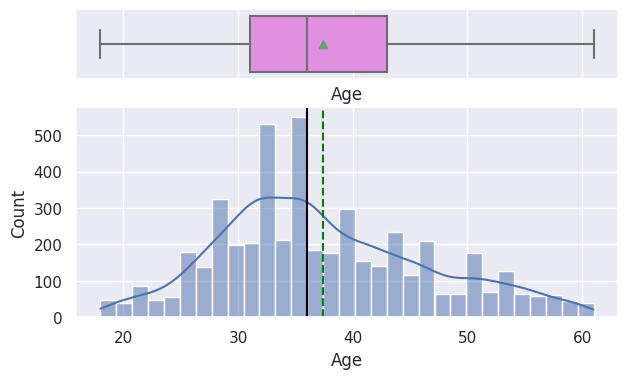

In [125]:
histogram_boxplot(data,'Age')

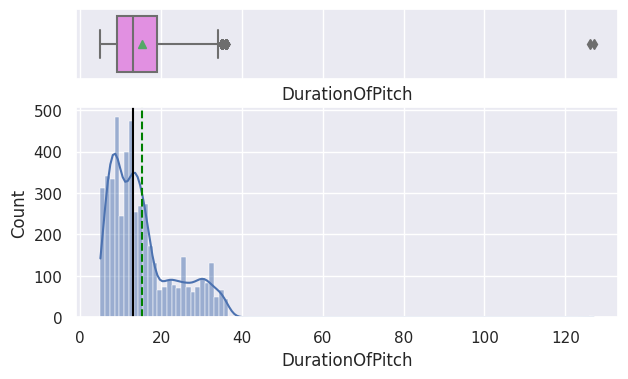

In [126]:
histogram_boxplot(data,'DurationOfPitch')

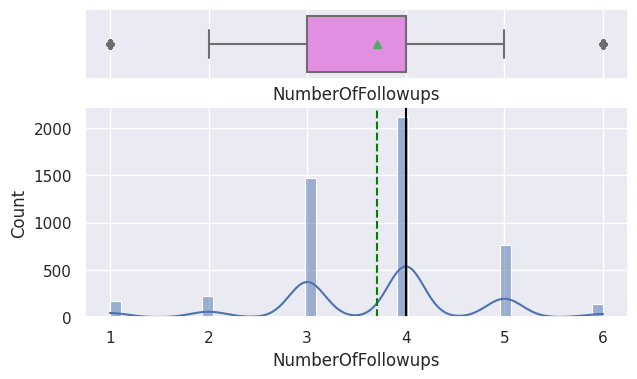

In [127]:
histogram_boxplot(data,'NumberOfFollowups')

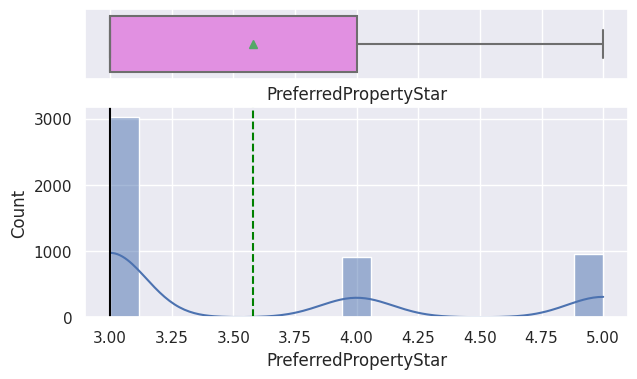

In [128]:
histogram_boxplot(data,'PreferredPropertyStar')

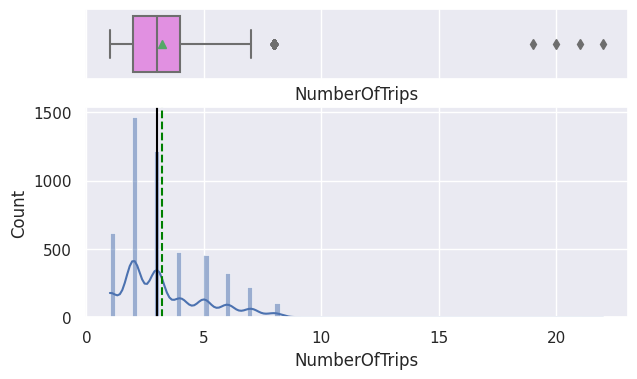

In [129]:
histogram_boxplot(data,'NumberOfTrips')

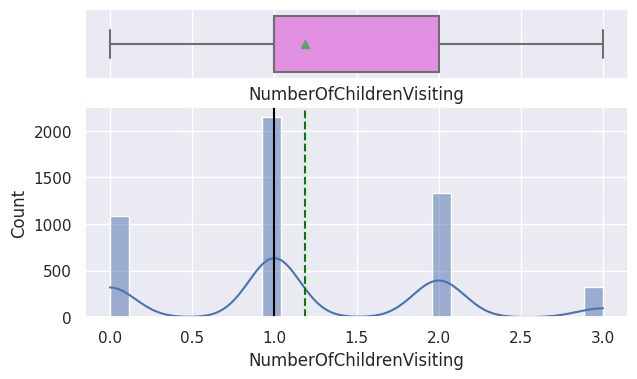

In [130]:
histogram_boxplot(data,'NumberOfChildrenVisiting')

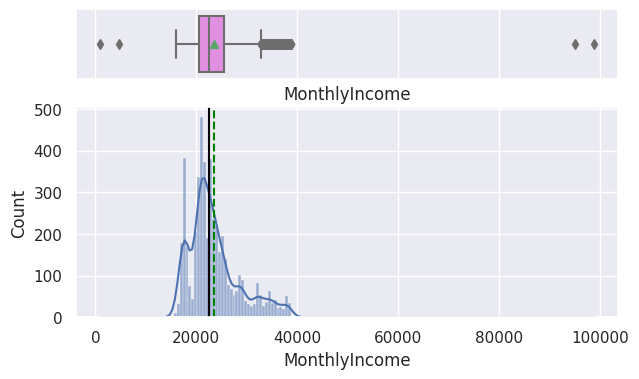

In [131]:
histogram_boxplot(data,'MonthlyIncome')

***Observations***
- Age is normally distrubted and doesn't have any outliers
- Duration of pitch is Right skewed with some outliers greater than 120 . This may need treatment
- Number of visitors is usually 3 with a outlier of 5.
- Average number of folows up are 4 with extreme of 6
- Number of trips is right skewed with some outliers where trips are greater than 17.
- Monthly income is Right skewed.It has some outlier as higher end.

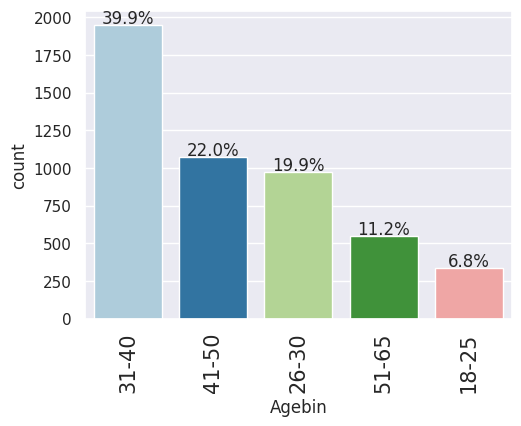

In [136]:
labeled_barplot(data,'Agebin',perc=True)

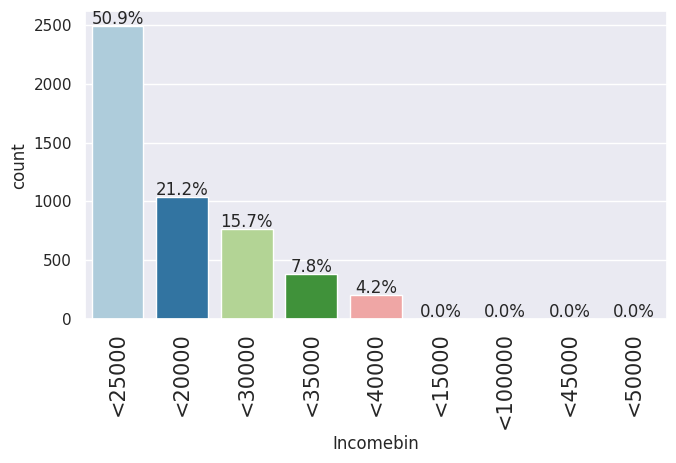

In [137]:
labeled_barplot(data,'Incomebin',perc=True)

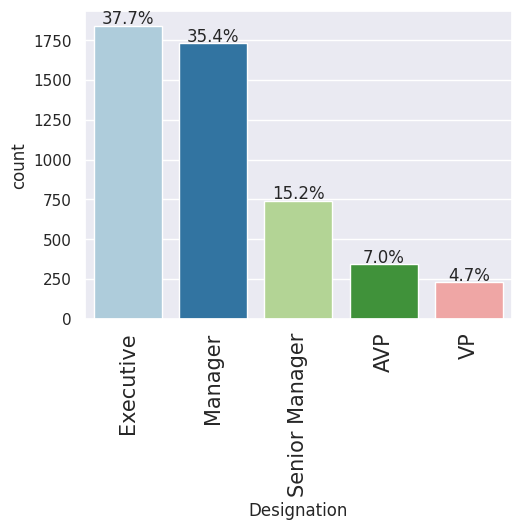

In [138]:
labeled_barplot(data,'Designation',perc=True)

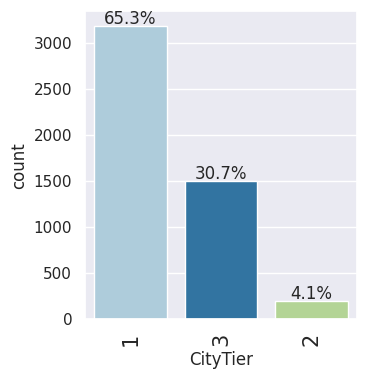

In [139]:
labeled_barplot(data,'CityTier',perc=True)

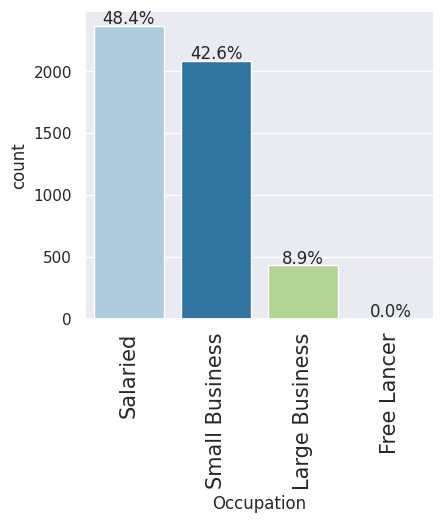

In [140]:
labeled_barplot(data,'Occupation',perc=True)

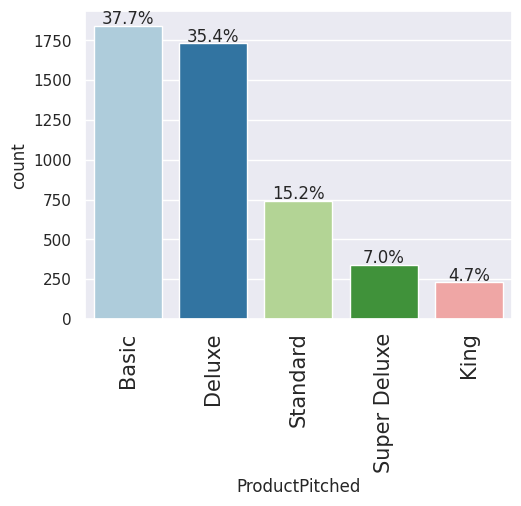

In [141]:
labeled_barplot(data,'ProductPitched',perc=True)

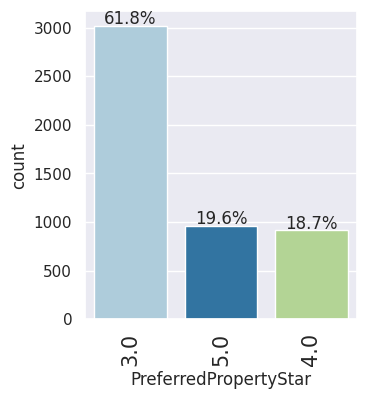

In [142]:
labeled_barplot(data,'PreferredPropertyStar',perc=True)

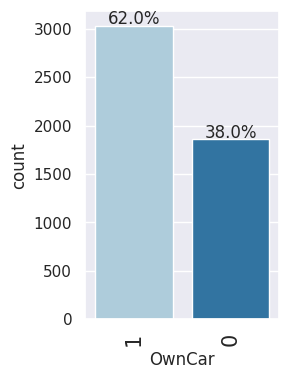

In [143]:
labeled_barplot(data,'OwnCar',perc=True)

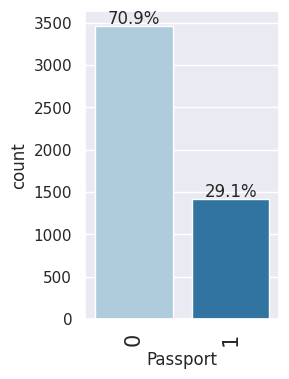

In [144]:
labeled_barplot(data,'Passport',perc=True)

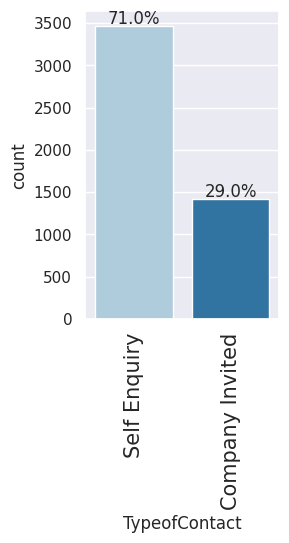

In [145]:
labeled_barplot(data,'TypeofContact',perc=True)

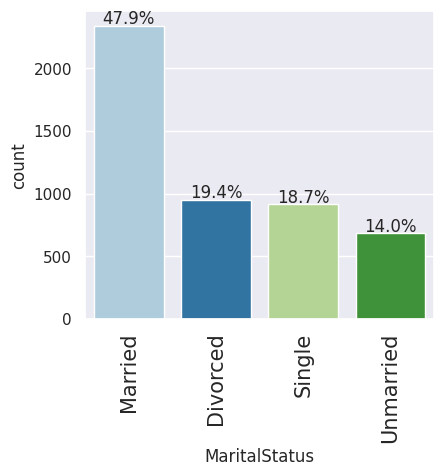

In [146]:
labeled_barplot(data,'MaritalStatus',perc=True)

<Figure size 300x100 with 0 Axes>

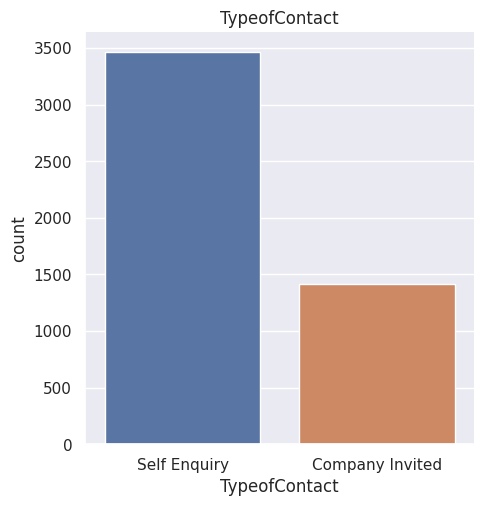

In [150]:
plt.figure(figsize=(3,1))
sns.catplot(x = 'TypeofContact', data = data, kind = 'count');
plt.title("TypeofContact")
plt.show()

<Figure size 300x100 with 0 Axes>

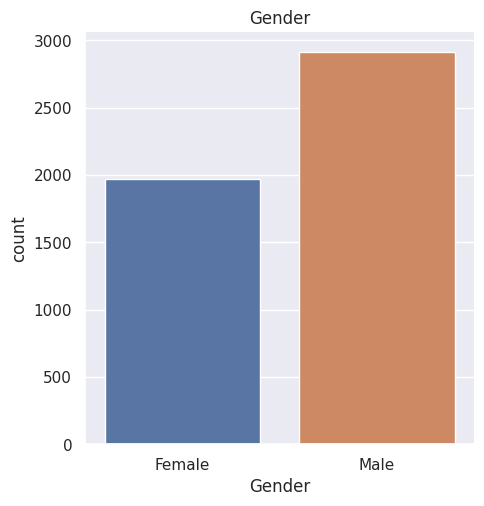

In [153]:
plt.figure(figsize=(3,1))
sns.catplot(x = 'Gender', data = data, kind = 'count');
plt.title("Gender")
plt.show()

<Figure size 300x100 with 0 Axes>

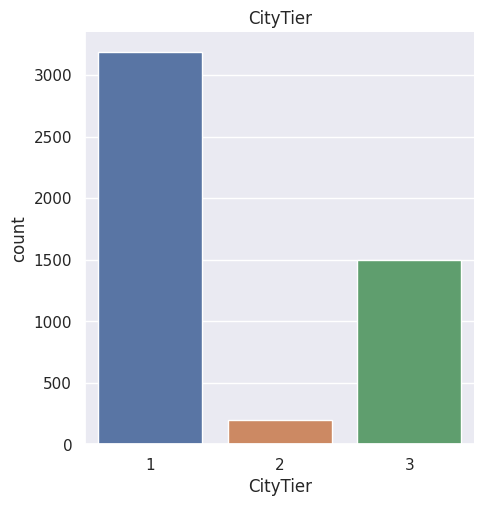

In [152]:
plt.figure(figsize=(3,1))
sns.catplot(x = 'CityTier', data = data, kind = 'count');
plt.title("CityTier")
plt.show()

<Figure size 300x100 with 0 Axes>

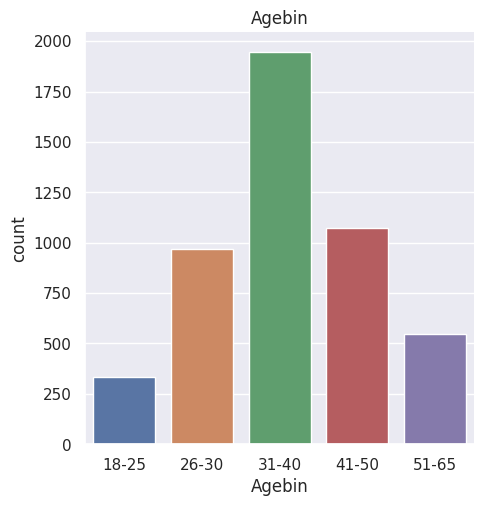

In [154]:
plt.figure(figsize=(3,1))
sns.catplot(x = 'Agebin', data = data, kind = 'count');
plt.title("Agebin")
plt.show()

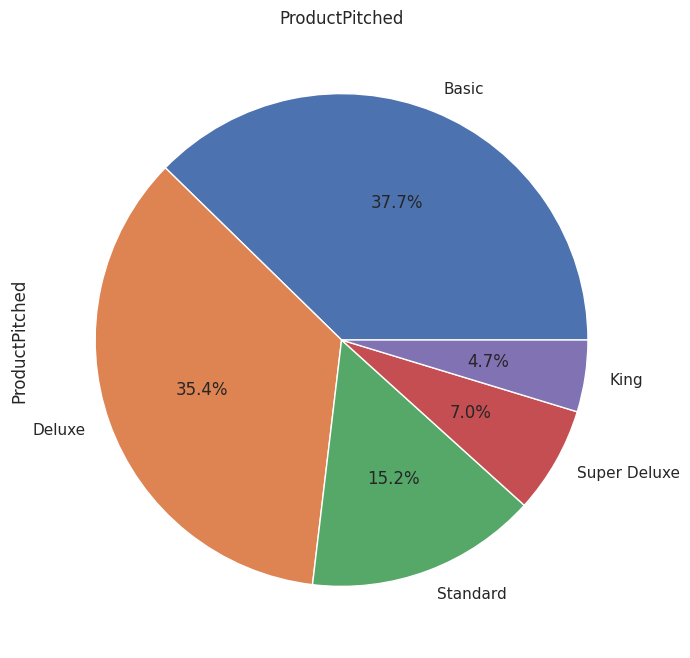

In [151]:
plt.figure(figsize=(14,7))
data['ProductPitched'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("ProductPitched")
plt.show()

***Observations***

- Approx. 40% of the customers are belonging to the age group 31-40
- Around 6% of the customers belonging to the age group 18-25
- Around 51% of the customers monthly income is less than 25000
- Only 4.2 % of the customers are earning less than 40000 
- Executives and Managers are the major workforce interested in the travel packages and opting for travel plans
- Salaried class leads the way followed by small business and they both contribute to 90% of the total customers
- 65.3% of the customers are belonging to the Tier-1 cities
- Approx 62% prefers 3 star properties for stay
- Basic Product is the most pitched product among customers and comprises of 37.7% followed by Deluxe
- 62% of the customers Own cars
- 71% of customers didnt have passports
- 47.9% of the customers are married
- 71% made self enquiry for the travel


### Bivariate analysis

[Text(0.5, 1.0, 'Lineplot for Age & Income')]

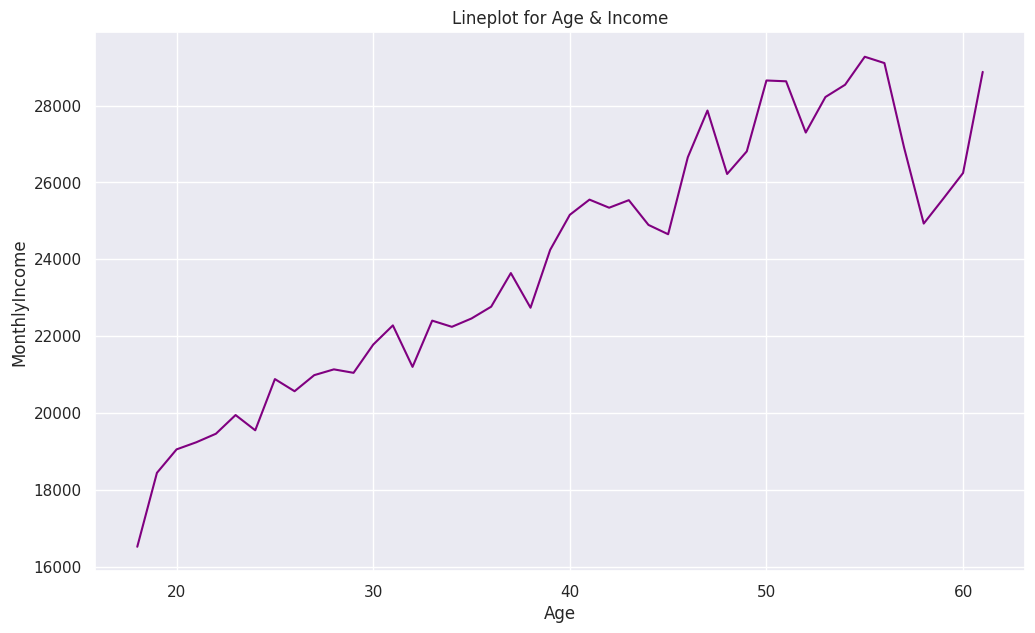

In [160]:
sns.lineplot(x = 'Age', y = 'MonthlyIncome', data = data, color = 'purple',ci = None).set(title='Lineplot for Age & Income')

[Text(0.5, 1.0, 'Lineplot for Age & PitchDuration')]

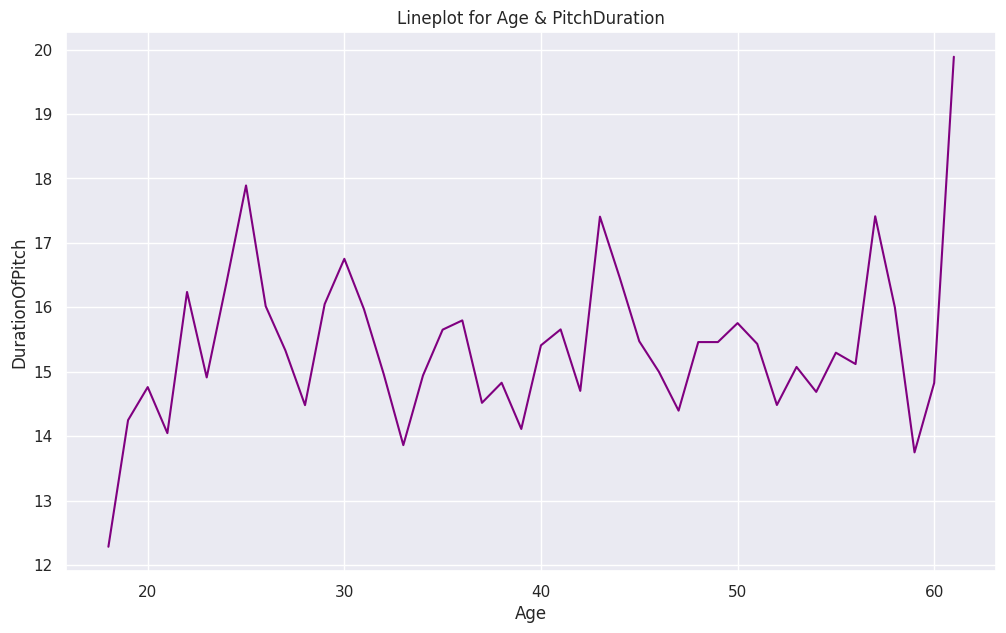

In [161]:
sns.lineplot(x = 'Age', y = 'DurationOfPitch', data = data, color = 'purple',ci = None).set(title='Lineplot for Age & PitchDuration')

[Text(0.5, 1.0, 'Lineplot for Age & PropertyStar')]

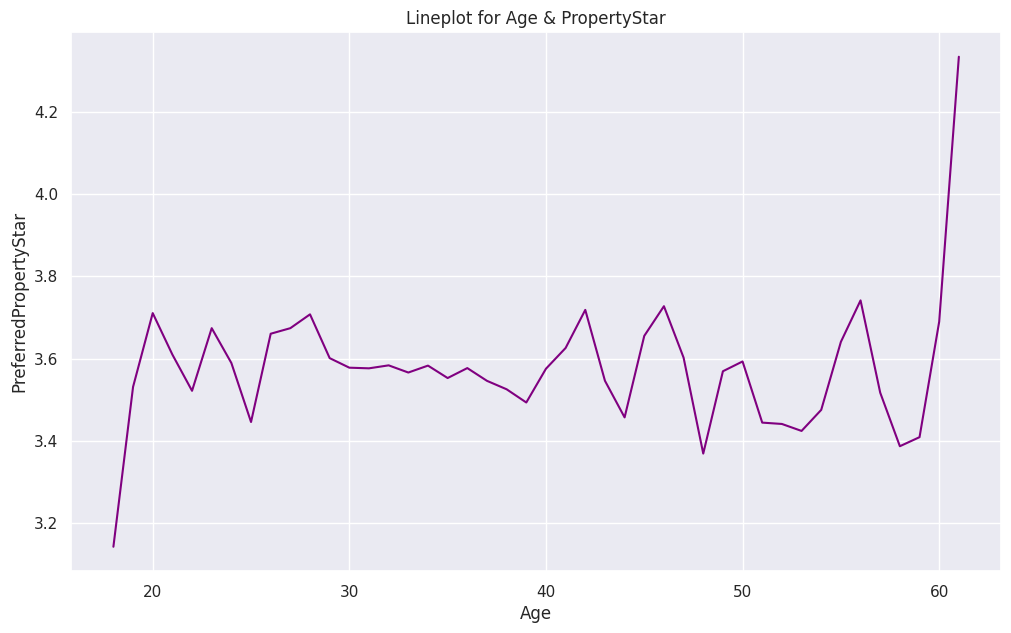

In [163]:
sns.lineplot(x = 'Age', y = 'PreferredPropertyStar', data = data, color = 'purple',ci = None).set(title='Lineplot for Age & PropertyStar')

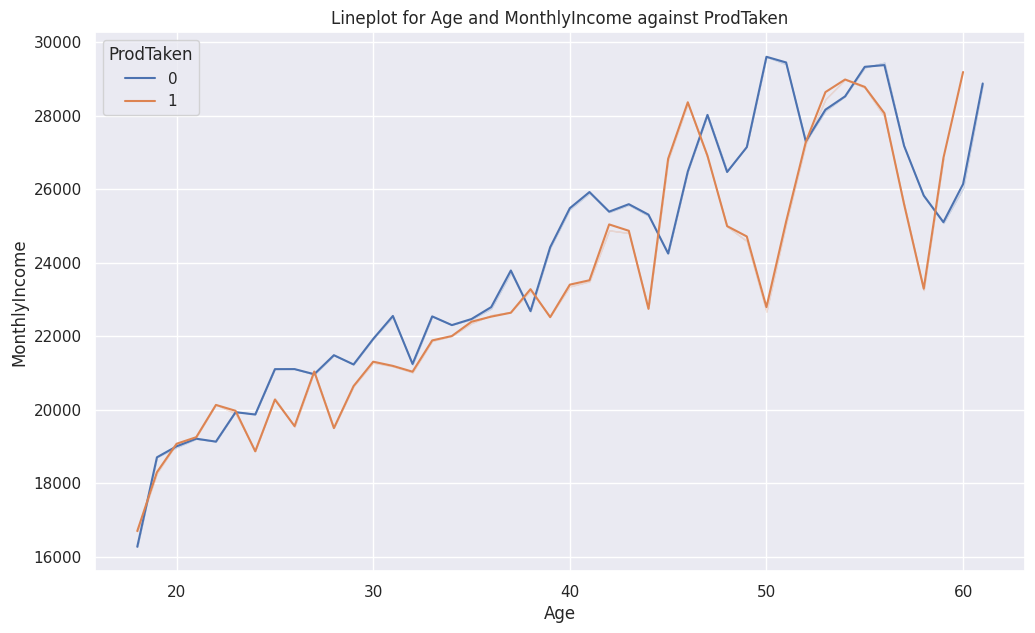

In [165]:
sns.lineplot(data=data, x='Age', y='MonthlyIncome', ci=False, hue='ProdTaken').set(title='Lineplot for Age and MonthlyIncome against ProdTaken');

***Observation***
- We can see that Age and Monthly Income are highly related to each other 
- The Duration of pitch is more for Aged customers
- The Aged customer prefer properties with more than 3.8 star rating

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


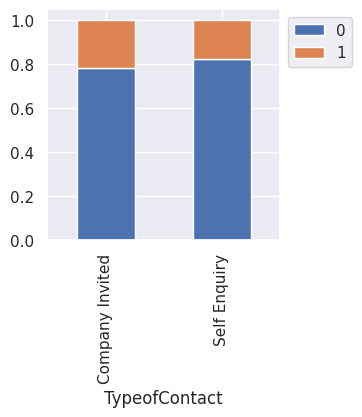

In [174]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "TypeofContact", "ProdTaken")

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


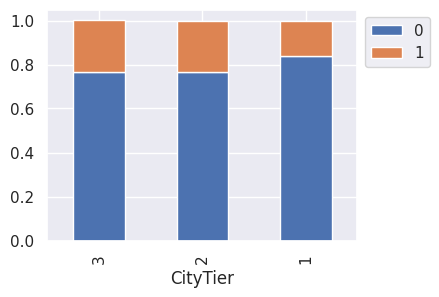

In [175]:
stacked_barplot(df, "CityTier", "ProdTaken")

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


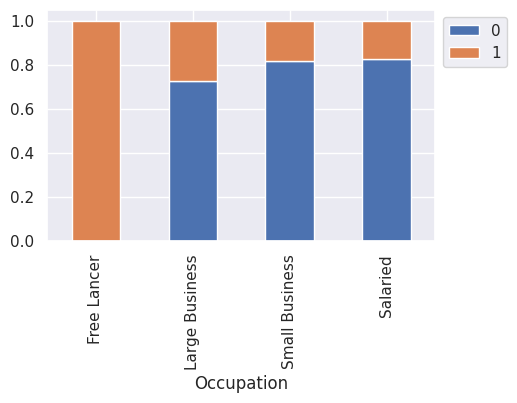

In [176]:
stacked_barplot(df, "Occupation", "ProdTaken")

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1500  317  1817
Fe Male     130   25   155
------------------------------------------------------------------------------------------------------------------------


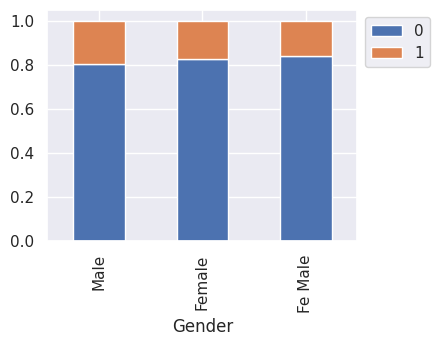

In [177]:
stacked_barplot(df, "Gender", "ProdTaken")

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


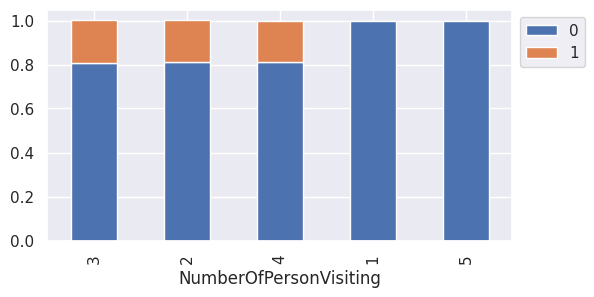

In [183]:
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken")

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


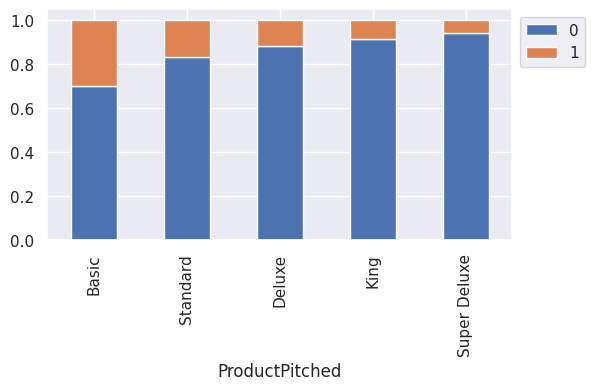

In [178]:
stacked_barplot(df, "ProductPitched", "ProdTaken")

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


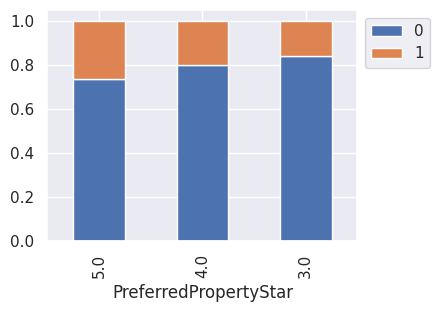

In [179]:
stacked_barplot(df, "PreferredPropertyStar", "ProdTaken")

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


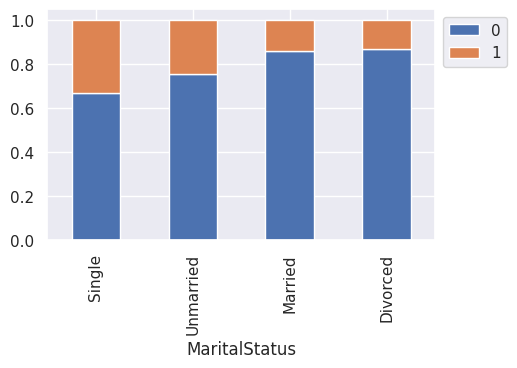

In [180]:
stacked_barplot(df, "MaritalStatus", "ProdTaken")

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


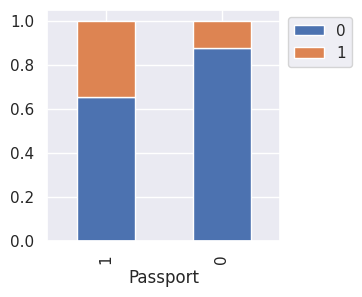

In [181]:
stacked_barplot(df, "Passport", "ProdTaken")

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


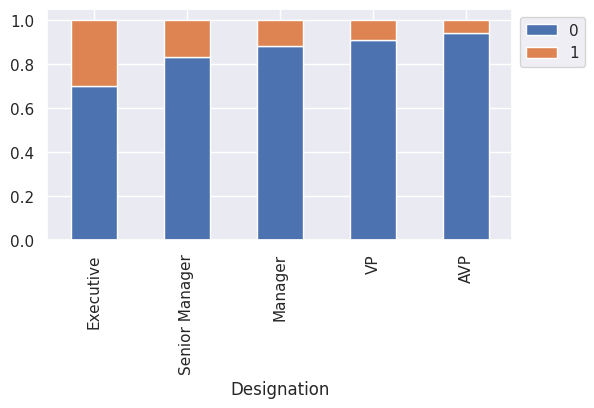

In [182]:
stacked_barplot(df, "Designation", "ProdTaken")

***Observations***
- More Customers with "Company Invited" contact have opted for the Travel Package when compared to Customers with "Self Enquiry"
- % of Customers who opted for travel pakages are more from Tier 2 and 3 cities 
- % of customers belonging to Large Business are inclined towards the travel packages than Small business and Salaried customers
- Customers with Single or 5 accompanied persons are not opting for any plans
- Basic is the top pick from customers
- Properties with good rating are opted by customers even though the average is 3 star rating
- % of customers in single and unmarried opted for packages is more than the other groups
- customers having passports opted for packages
- Executives and Senior Managers opted for packages
- All the freelancers opted for the package however, the sample available is very low. so, we can't infre any information from the same

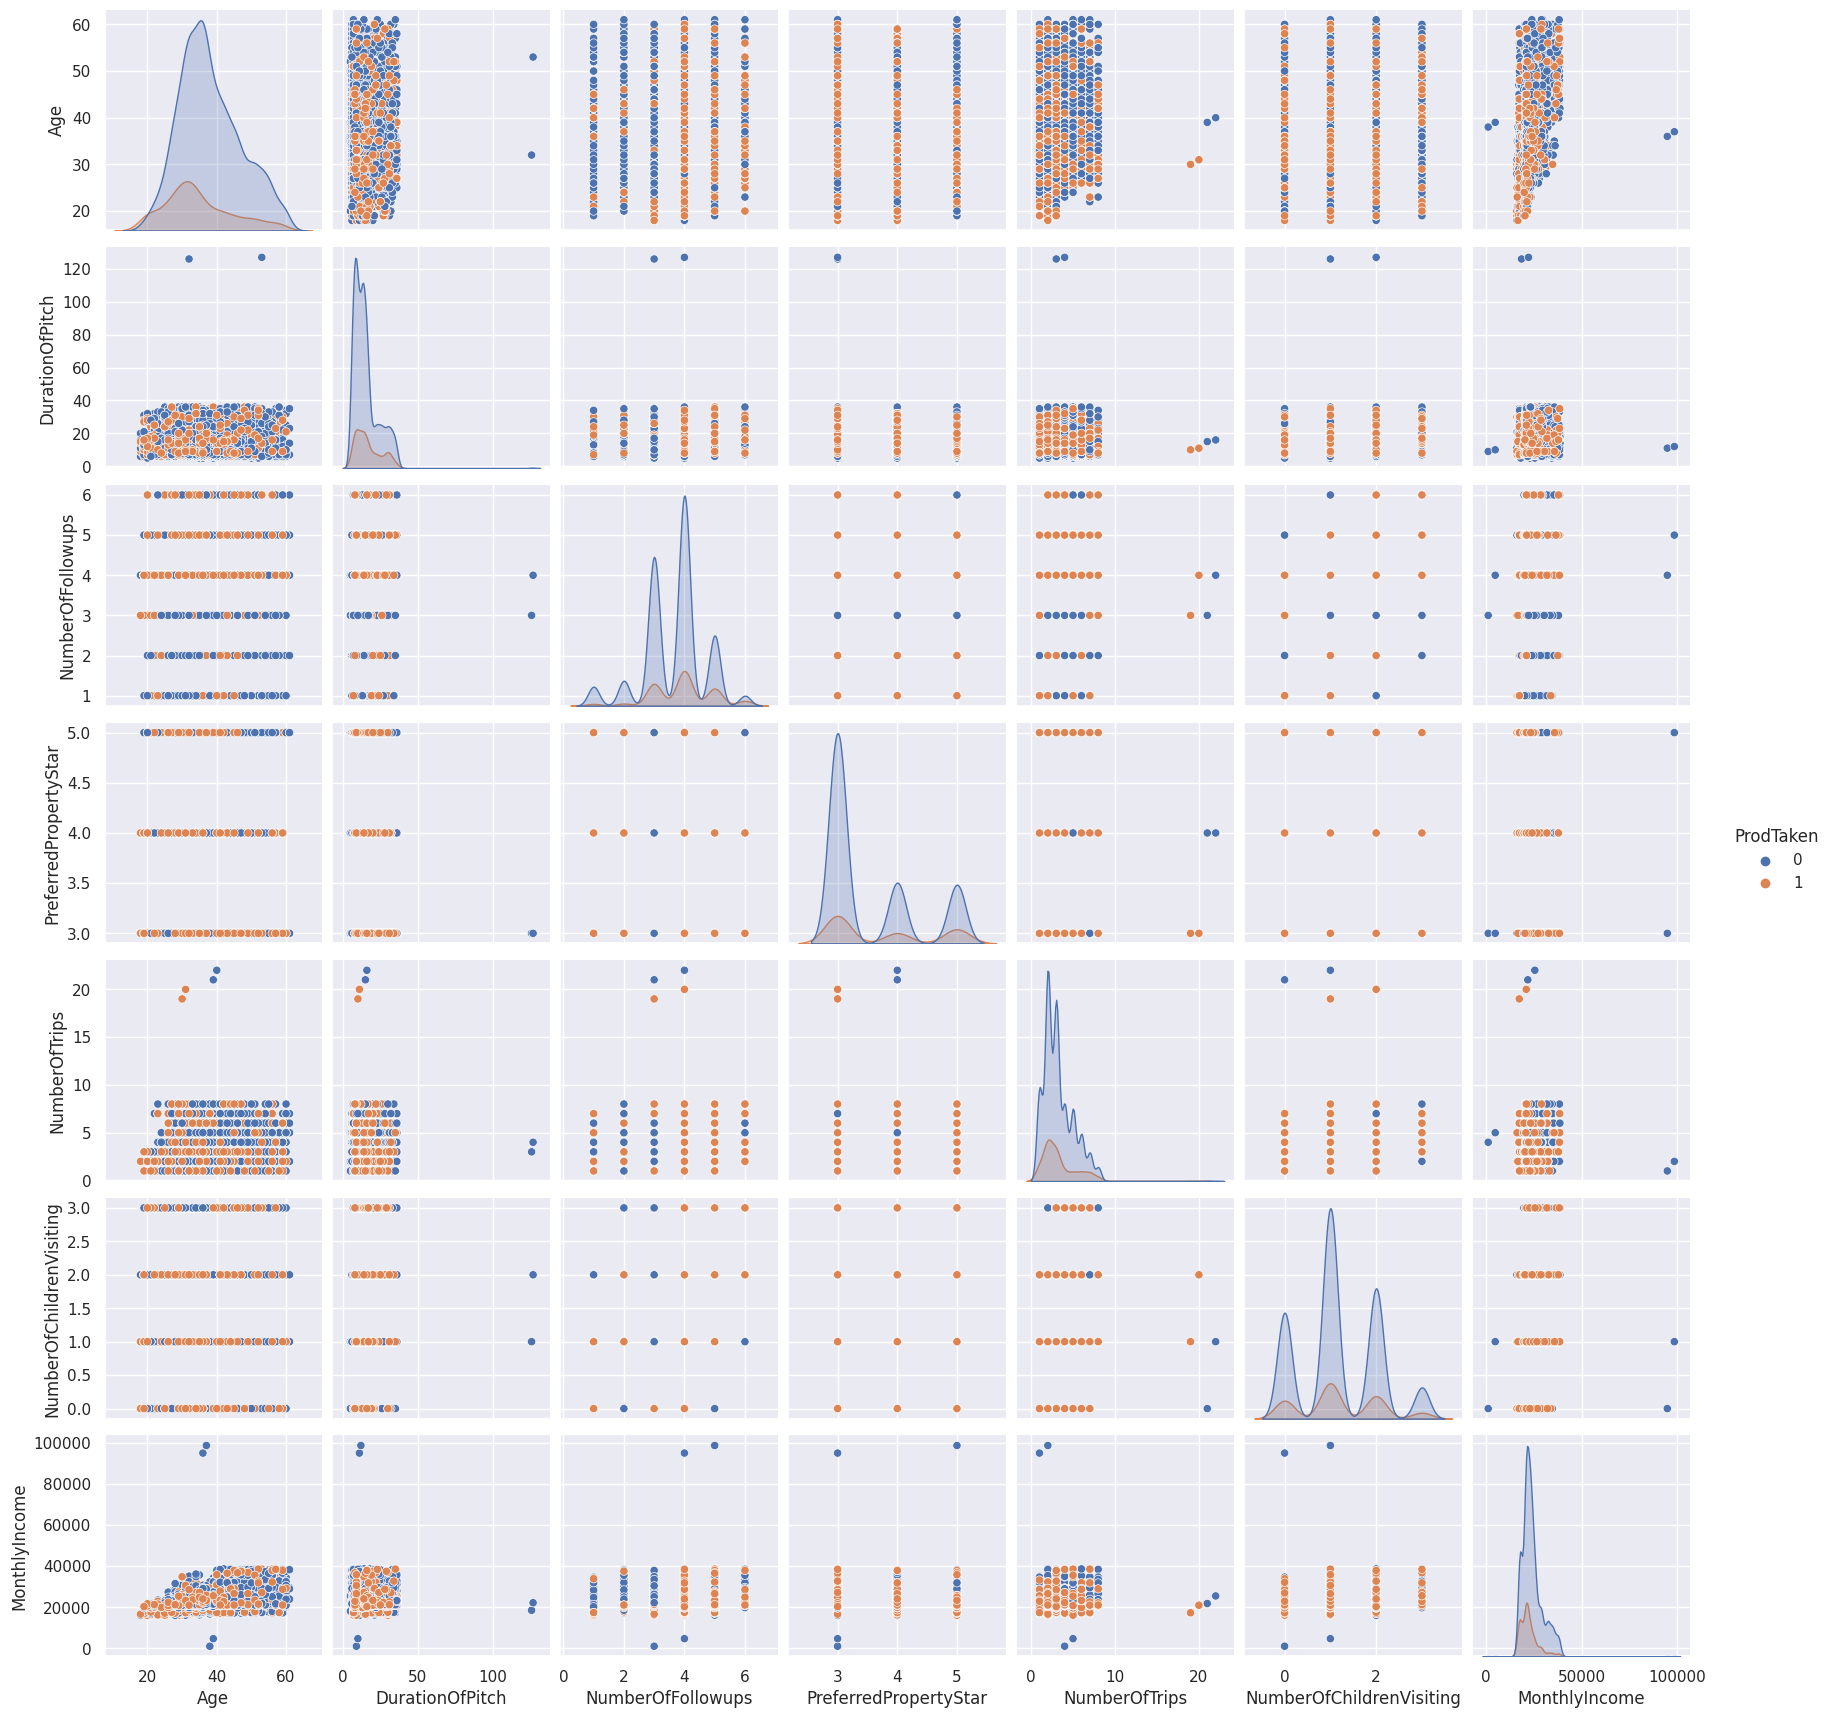

In [166]:
sns.pairplot(data=data, hue="ProdTaken")
plt.show()

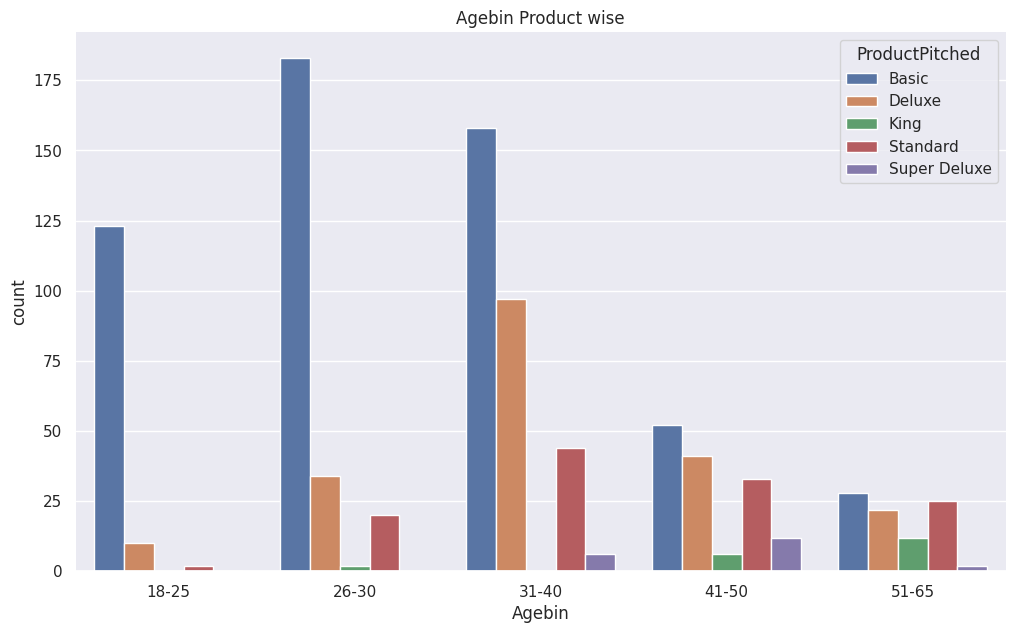

In [187]:
cust_prof=data[data['ProdTaken']==1]
sns.countplot(x='Agebin',hue='ProductPitched',data=cust_prof).set_title('Agebin Product wise')
sns.despine(top=True,right=True,left=True) 

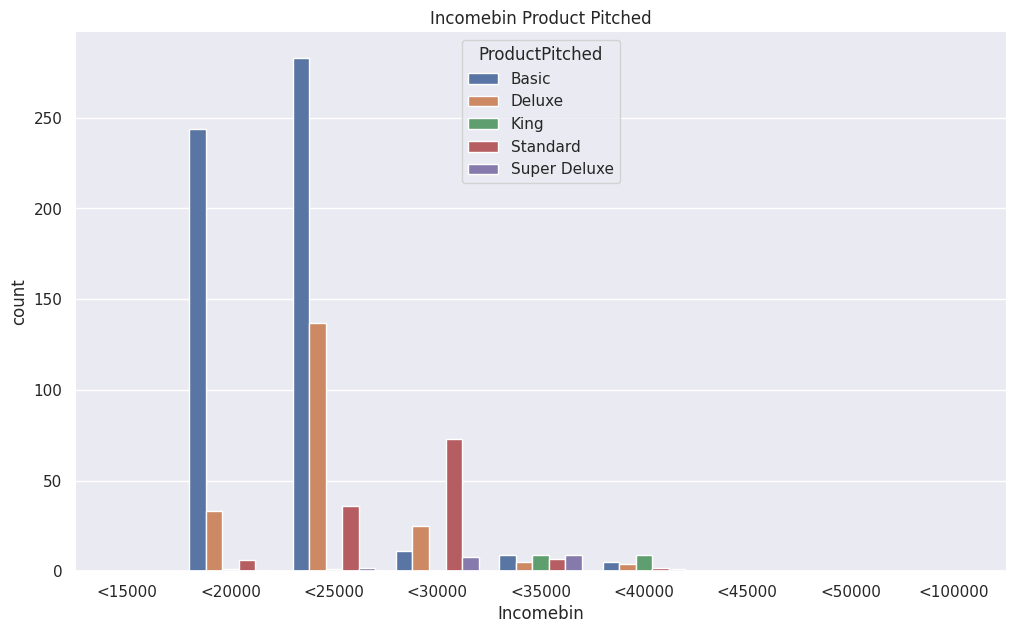

In [188]:
sns.countplot(x='Incomebin',hue='ProductPitched',data=cust_prof).set_title('Incomebin Product Pitched')
sns.despine(top=True,right=True,left=True)

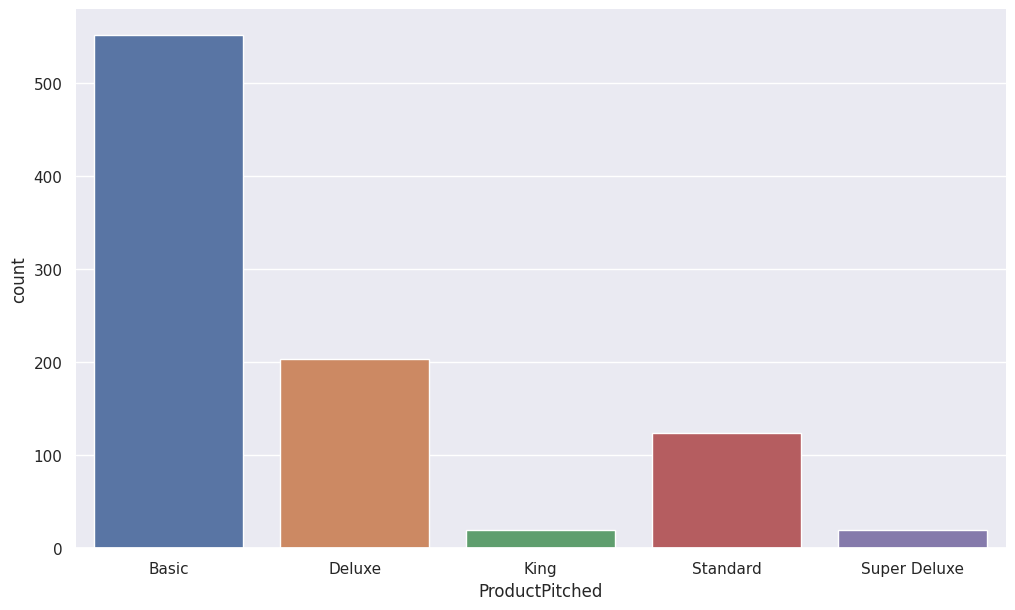

In [189]:
sns.countplot(x="ProductPitched", data=cust_prof)
sns.despine(top=True,right=True,left=True)

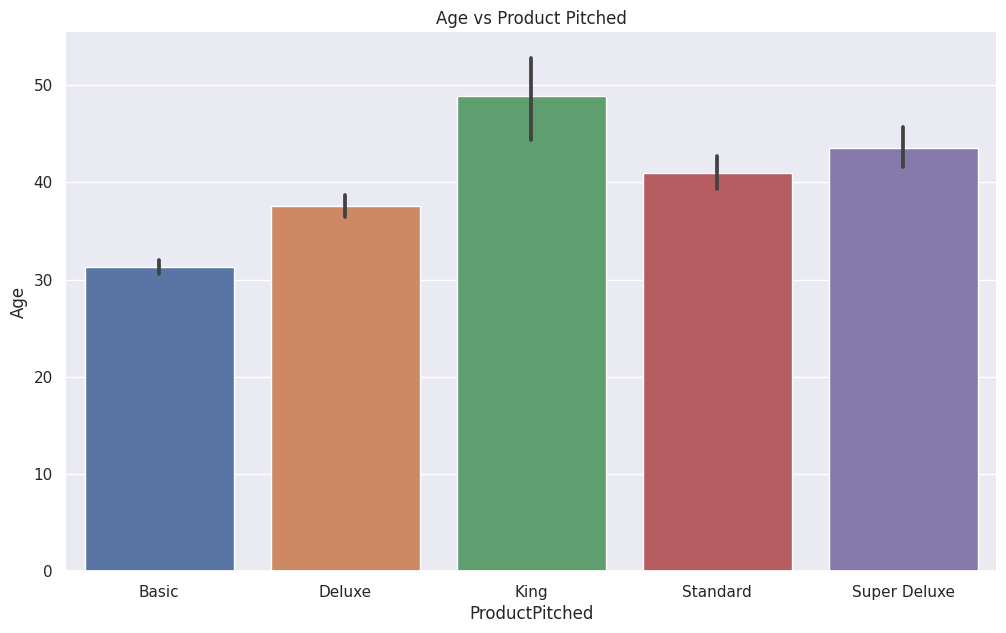

In [190]:
sns.barplot(y='Age',x='ProductPitched',data=cust_prof).set_title('Age vs Product Pitched')
sns.despine(top=True,right=True,left=True) 

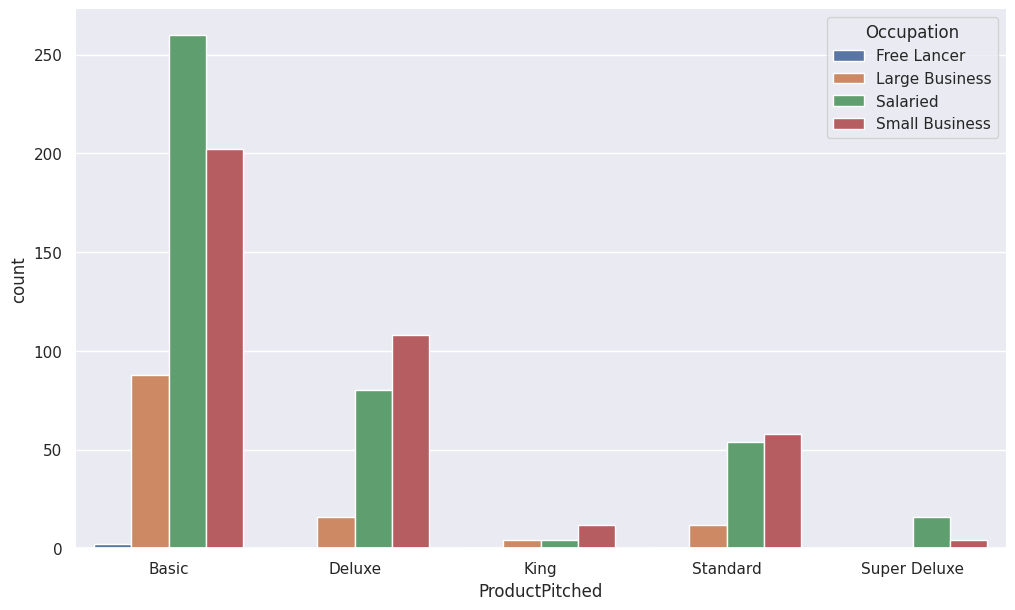

In [191]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Occupation")
sns.despine(top=True,right=True,left=True) 

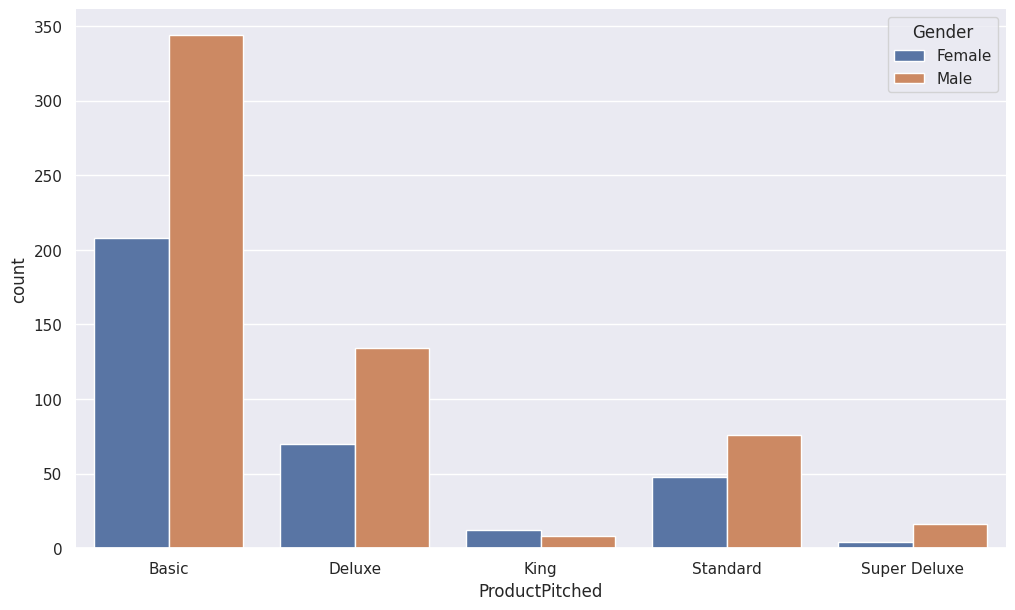

In [192]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Gender")
sns.despine(top=True,right=True,left=True)

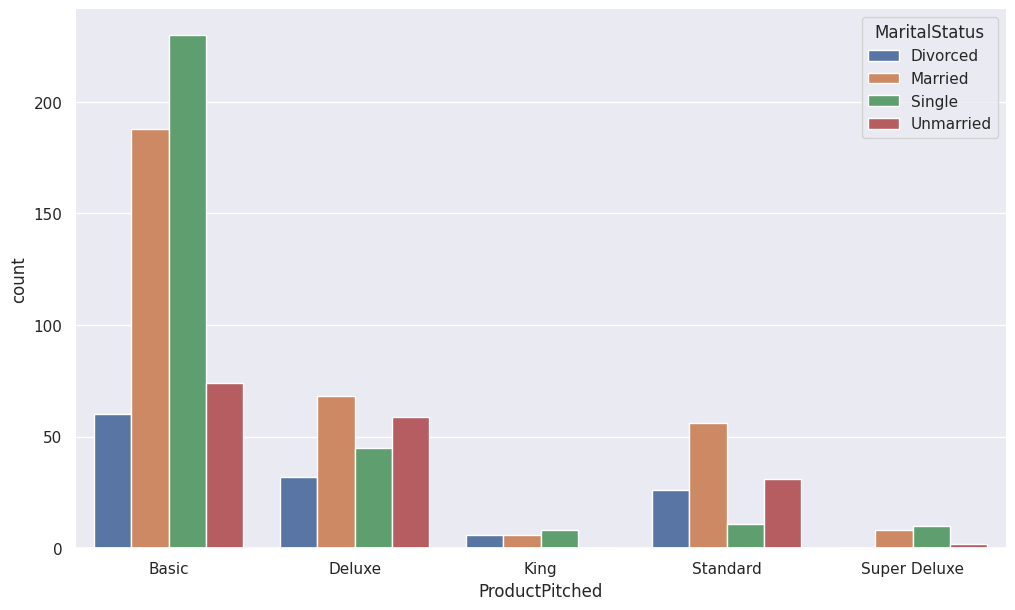

In [193]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="MaritalStatus")
sns.despine(top=True,right=True,left=True)

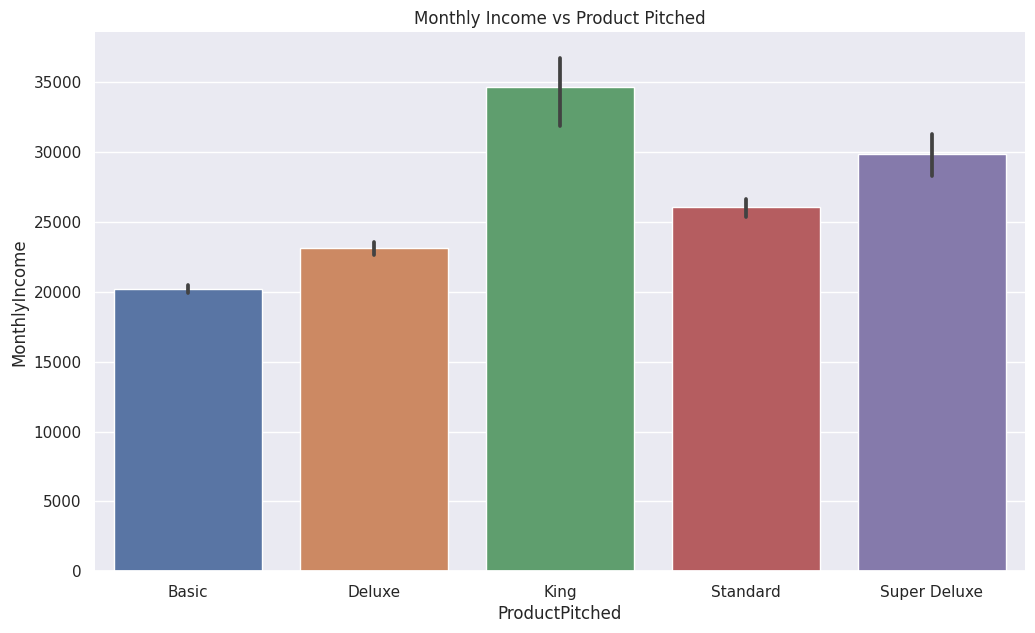

In [194]:
sns.barplot(y='MonthlyIncome',x='ProductPitched',data=cust_prof).set_title('Monthly Income vs Product Pitched')
sns.despine(top=True,right=True,left=True)

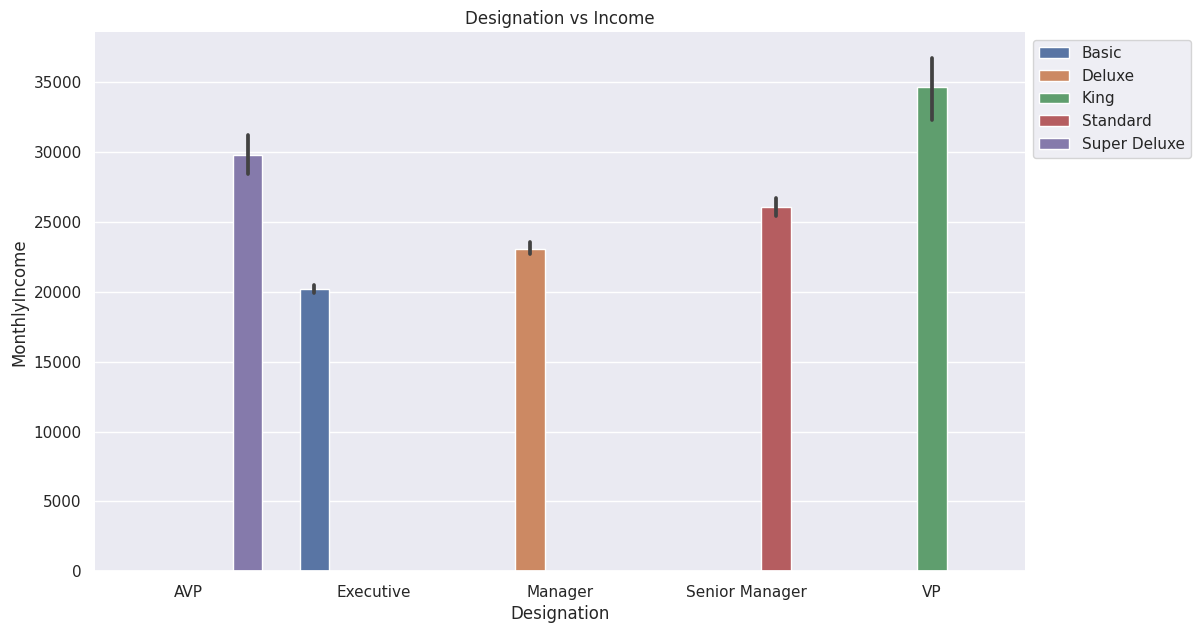

In [195]:
sns.barplot(x='Designation',y='MonthlyIncome',data=cust_prof,hue='ProductPitched').set_title('Designation vs Income')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1, 1))

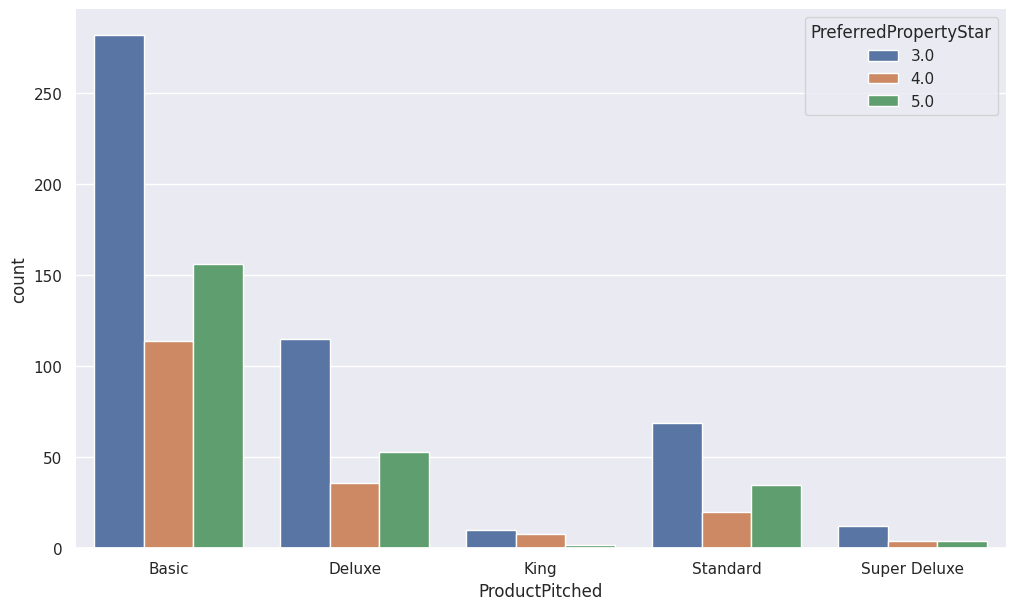

In [196]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="PreferredPropertyStar")
sns.despine(top=True,right=True,left=True)

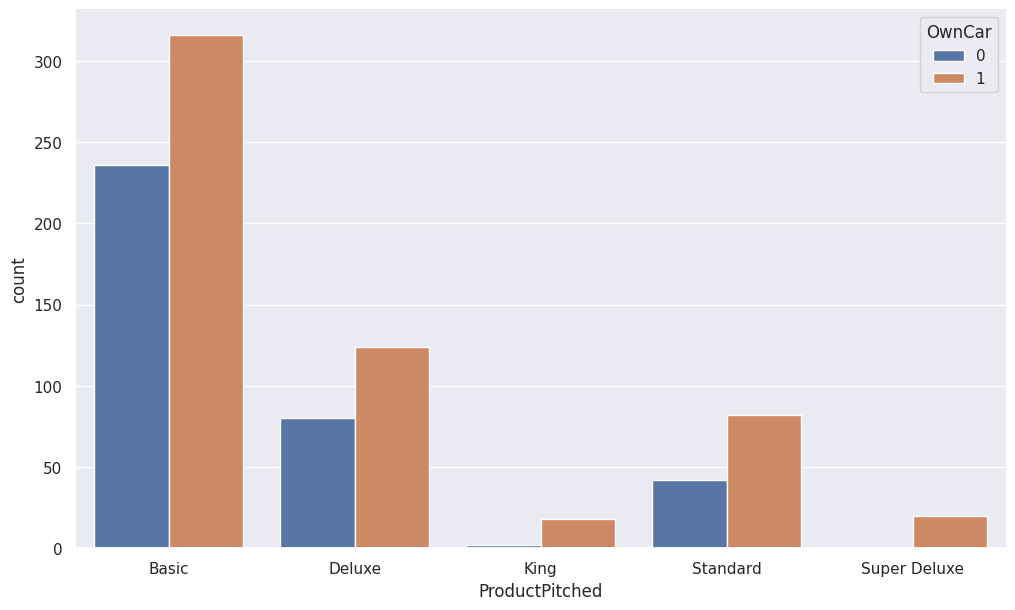

In [197]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="OwnCar")
sns.despine(top=True,right=True,left=True)

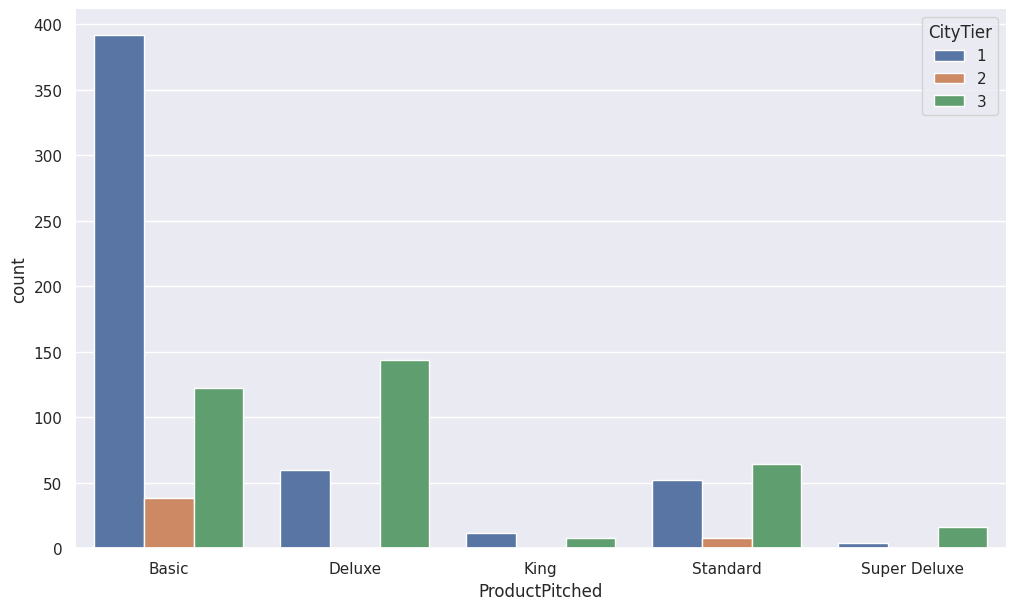

In [198]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="CityTier")
sns.despine(top=True,right=True,left=True)

**Correlation Check**

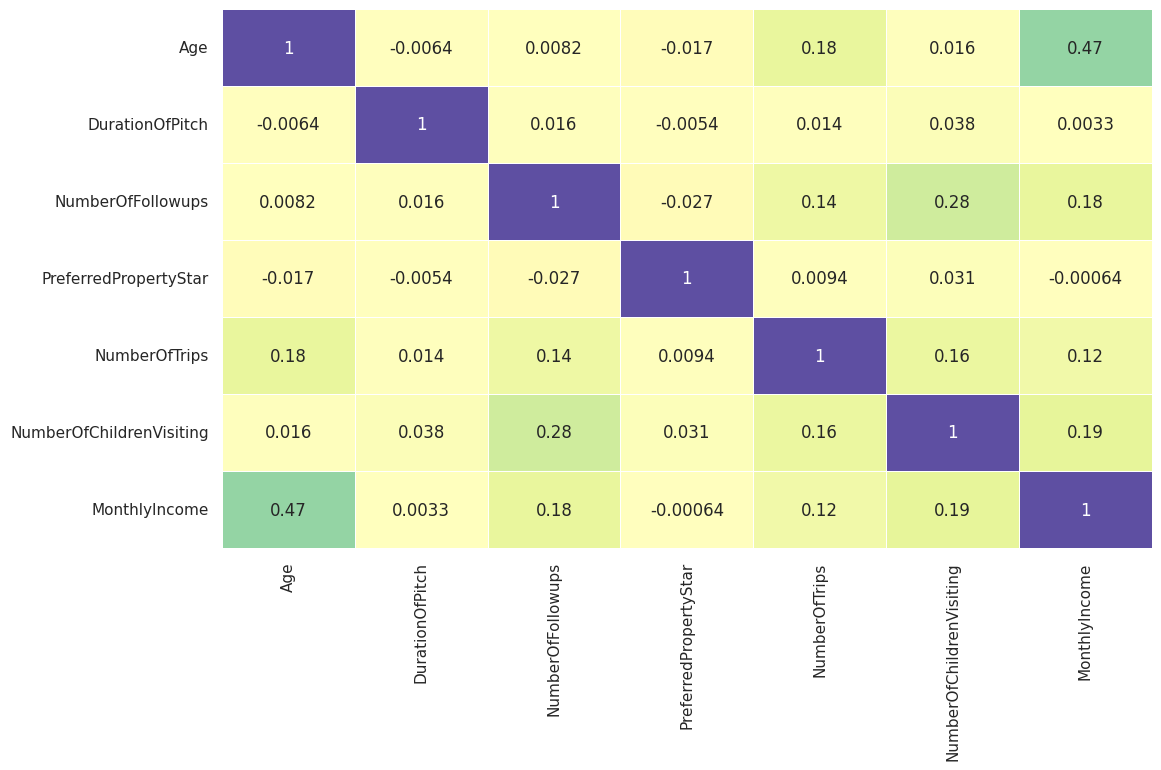

In [147]:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

***Observation***
- We can see that Age and Monthly Income are correlated
- The remaining parameters are having less impact or relation with each other
- The values indicate there is a slight relation between parameters but not providing any insight for the company

***Outliers Treatment***

- From the plots, it is clear that the outliers are there only for Monthly Income and Number of Trips.

In [28]:
Outliertreateddata = data.copy()
Q3 = Outliertreateddata['MonthlyIncome'].quantile(0.75)
Q1 = Outliertreateddata['MonthlyIncome'].quantile(0.25)
IQR = Q3-Q1
Outliertreateddata = Outliertreateddata[(Outliertreateddata['MonthlyIncome'] > Q1 - 1.5*IQR) & (Outliertreateddata['MonthlyIncome'] < Q3 + 1.5*IQR)]

Q3 = Outliertreateddata['NumberOfTrips'].quantile(0.75)
Q1 = Outliertreateddata['NumberOfTrips'].quantile(0.25)
IQR = Q3-Q1
Outliertreateddata = Outliertreateddata[(Outliertreateddata['NumberOfTrips'] > Q1 - 1.5*IQR) & (Outliertreateddata['NumberOfTrips'] < Q3 + 1.5*IQR)]


In [29]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age                         0.000000
DurationOfPitch             2.291326
NumberOfFollowups           6.382979
PreferredPropertyStar       0.000000
NumberOfTrips               2.229951
NumberOfChildrenVisiting    0.000000
MonthlyIncome               7.671849
dtype: float64

In [30]:
# Check MonthlyIncome extreme values
data.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch Occupation  \
2482         0  37.0     Self Enquiry        1             12.0   Salaried   
38           0  36.0     Self Enquiry        1             11.0   Salaried   
2634         0  53.0     Self Enquiry        1              7.0   Salaried   
4104         0  53.0     Self Enquiry        1              7.0   Salaried   
3190         0  42.0  Company Invited        1             14.0   Salaried   

      Gender NumberOfPersonVisiting  NumberOfFollowups ProductPitched  ...  \
2482  Female                      3                5.0          Basic  ...   
38    Female                      2                4.0          Basic  ...   
2634    Male                      4                5.0           King  ...   
4104    Male                      4                5.0           King  ...   
3190  Female                      3                6.0           King  ...   

      MaritalStatus NumberOfTrips  Passport PitchSatisfactionScore OwnCar  \
2482       Divorced           2.0         1                      2      1   
38         Divorced           1.0         1                      2      1   
2634       Divorced           2.0         0                      2      1   
4104        Married           2.0         0                      1      1   
3190        Married           3.0         0                      4      1   

     NumberOfChildrenVisiting  Designation MonthlyIncome  Agebin Incomebin  
2482                      1.0    Executive       98678.0   31-40   <100000  
38                        0.0    Executive       95000.0   31-40   <100000  
2634                      2.0           VP       38677.0   51-65    <40000  
4104                      3.0           VP       38677.0   51-65    <40000  
3190                      1.0           VP       38651.0   41-50    <40000  

[5 rows x 21 columns]

In [31]:
# Check NumberOfTrips extreme values
data.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
3260         0  40.0  Company Invited        1             16.0   
816          0  39.0  Company Invited        1             15.0   
2829         1  31.0  Company Invited        1             11.0   
385          1  30.0  Company Invited        1             10.0   
3155         1  30.0     Self Enquiry        1             17.0   

          Occupation  Gender NumberOfPersonVisiting  NumberOfFollowups  \
3260        Salaried    Male                      4                4.0   
816         Salaried    Male                      3                3.0   
2829  Large Business    Male                      3                4.0   
385   Large Business    Male                      2                3.0   
3155        Salaried  Female                      4                5.0   

     ProductPitched  ...  MaritalStatus NumberOfTrips  Passport  \
3260         Deluxe  ...      Unmarried          22.0         0   
816          Deluxe  ...      Unmarried          21.0         0   
2829          Basic  ...         Single          20.0         1   
385           Basic  ...         Single          19.0         1   
3155          Basic  ...         Single           8.0         1   

     PitchSatisfactionScore OwnCar NumberOfChildrenVisiting  Designation  \
3260                      2      1                      1.0      Manager   
816                       2      1                      0.0      Manager   
2829                      4      1                      2.0    Executive   
385                       4      1                      1.0    Executive   
3155                      5      1                      2.0    Executive   

     MonthlyIncome  Agebin Incomebin  
3260       25460.0   31-40    <30000  
816        21782.0   31-40    <25000  
2829       20963.0   26-30    <25000  
385        17285.0   26-30    <20000  
3155       21082.0   26-30    <25000  

[5 rows x 21 columns]

***Removing these outliers form duration of pitch, monthly income, and number of trips***

In [32]:
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#There are just 4 such observations with monthly income less than 12000 or greater than 40000
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

# There are just 4 such observations with number of trips greater than 8. 
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

## Customer profile based on the data on the products purchased

***Basic package*** 
 -  Most of the customers are in the Age group of 26-30 and drawing a monthly income of < 25000, Designation is in Executive category living in tier 1 city, are salaried and single. Customer contacted the company.Some of the Married customers also prefer this basic package.

***Deluxe package*** 
- Most of the customers are in the Age group of 31-40 and drawing a monthly income of < 25000, Designation is in Managers category living in tier 3 city, are doing small business  and married. Customer contacted the company.Some of the tier 1 customers and divorced customers also prefer this package.

***King*** 
- Most of the customers are in the Age group of 51-60 and drawing a monthly income of 30000-35000. Designation as VP and belonging to city tier 1 and are single and primary Occupation is small business.Females buy this package more than men.

***SuperDeluxe***
- Most of the customer have Monthly income < 35000, Age is in range 41-50, Designation as AVP, belongs to tier city 3 and are Single, male and occupation is salaried. Majority of them were company invited

***Standard package***
- Most of the customer have Monthly income <30000,Age is in range of 31-40 , Designation as Senior Manager, is married , from tier city 3,and occupation is small business. majority of them had self inquired.



### Insights based on EDA
- Customers accompanied by more than 1 person and less than 5 persons purchased the travel package
- Customers tend to buy packages when the sales team contacted them , have multiple followups, a good sales pitch and the basic package is a hit.
- Basic package is less expensive as it is the most sought product.
- Customers who had passport opted for the travel packages
- Most of the customers who bought the product were Executive and Senior manager
- More number of followups yielded the Customers to opt for packages
- Customers opted for packages prefer higher star rating properties rather than the lesser ones
- Company invited customers opted for packages which indicates marketing is the key
- Customer from 18-25 age purchased the product taken, followed by 26-30.
- Customers earning less than 25K preferred more rather than the other groups
- Large Business owners have higher chance of purchasing the travel package
- Single and unmarried people are interested for purchasing the package and evident from the data
- Customers who took more trips had higher chances of purchaing the packages
- Gender,number of children visiting, having a car are not relevant parameters and having less value in the analysis


## Data Preprocessing
- Missing Value Treatment
- Outlier Detection and Treatment
- Data Preparation for Model building
- Feature Engineering
- Model Evaluation criteria

As part of the EDA, Missing value treatment, Outlier detection and treatment, feature engineering are completed and we will focus on the data preparation on Model building and the evaluation criterion

### Model Evaluation Criteria

1.   Predicting that the customer will purchase a Travel Package but actually they don"t buy - FALSE POSITIVE
2.   Predicting that the customer will not purchase a Travel Package but they buy - FALSE NEGATIVE

The goal for the organization is to

- Perform sales pitch on the right customers to increase the sales.
- Predict and Identify all prospective customers who will purchase the newly introduced wellness travel package.

#### Metric for Optimization

For the above objectives, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized. The greater the F1-Score, greater the chances of predicting both classes correctly.

We will build following models, evaluate, tune and compare them with the metrics and derive the outcome from all the models:

1.  Decision Tree Classifier
2.  Bagging Classifier
3.  Random Forest Classifier
4.  ADABoost
5.  GradientBoost
6.  XG Boost
7.  Stacking Classifier

### Data Preparataion for model building

- Data is imbalanced in the distribution of the target classes, so we will use the stratify parameter to balance it in train and test sets
- The model is meant to predict the future customers and hence droppping the columns which provides details of customer interaction

In [33]:
# Separating features and the target column
X = data.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken']

In [34]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [35]:
X_train.shape, X_test.shape

((3414, 25), (1464, 25))

In [36]:
y.value_counts(1)

0    0.811808
1    0.188192
Name: ProdTaken, dtype: float64

In [37]:
y_test.value_counts(1)

0    0.811475
1    0.188525
Name: ProdTaken, dtype: float64

- We have 3,414 observations in the train set and 1,464 observations in the test set.

## Model Building

### Bagging Methods

In [38]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    f1_score_train = metrics.f1_score(y_train,pred_train)
    f1_score_test = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,f1_score_train,f1_score_test))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Decision Tree Classifier

In [40]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
dtree_model_perf=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8586065573770492
Recall on training set :  1.0
Recall on test set :  0.6376811594202898
Precision on training set :  1.0
Precision on test set :  0.6219081272084805
F1 Score on training set :  1.0
F1 Score on test set :  0.629695885509839


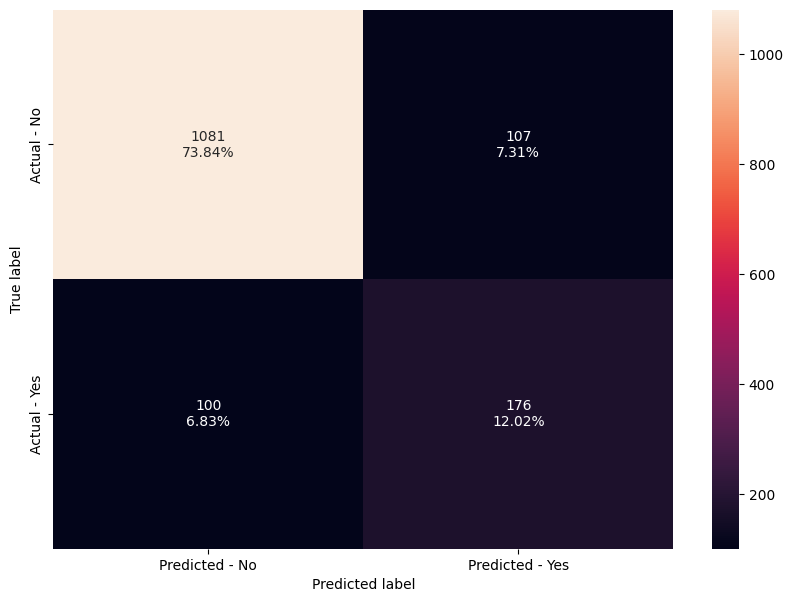

In [42]:
make_confusion_matrix(dtree,y_test)

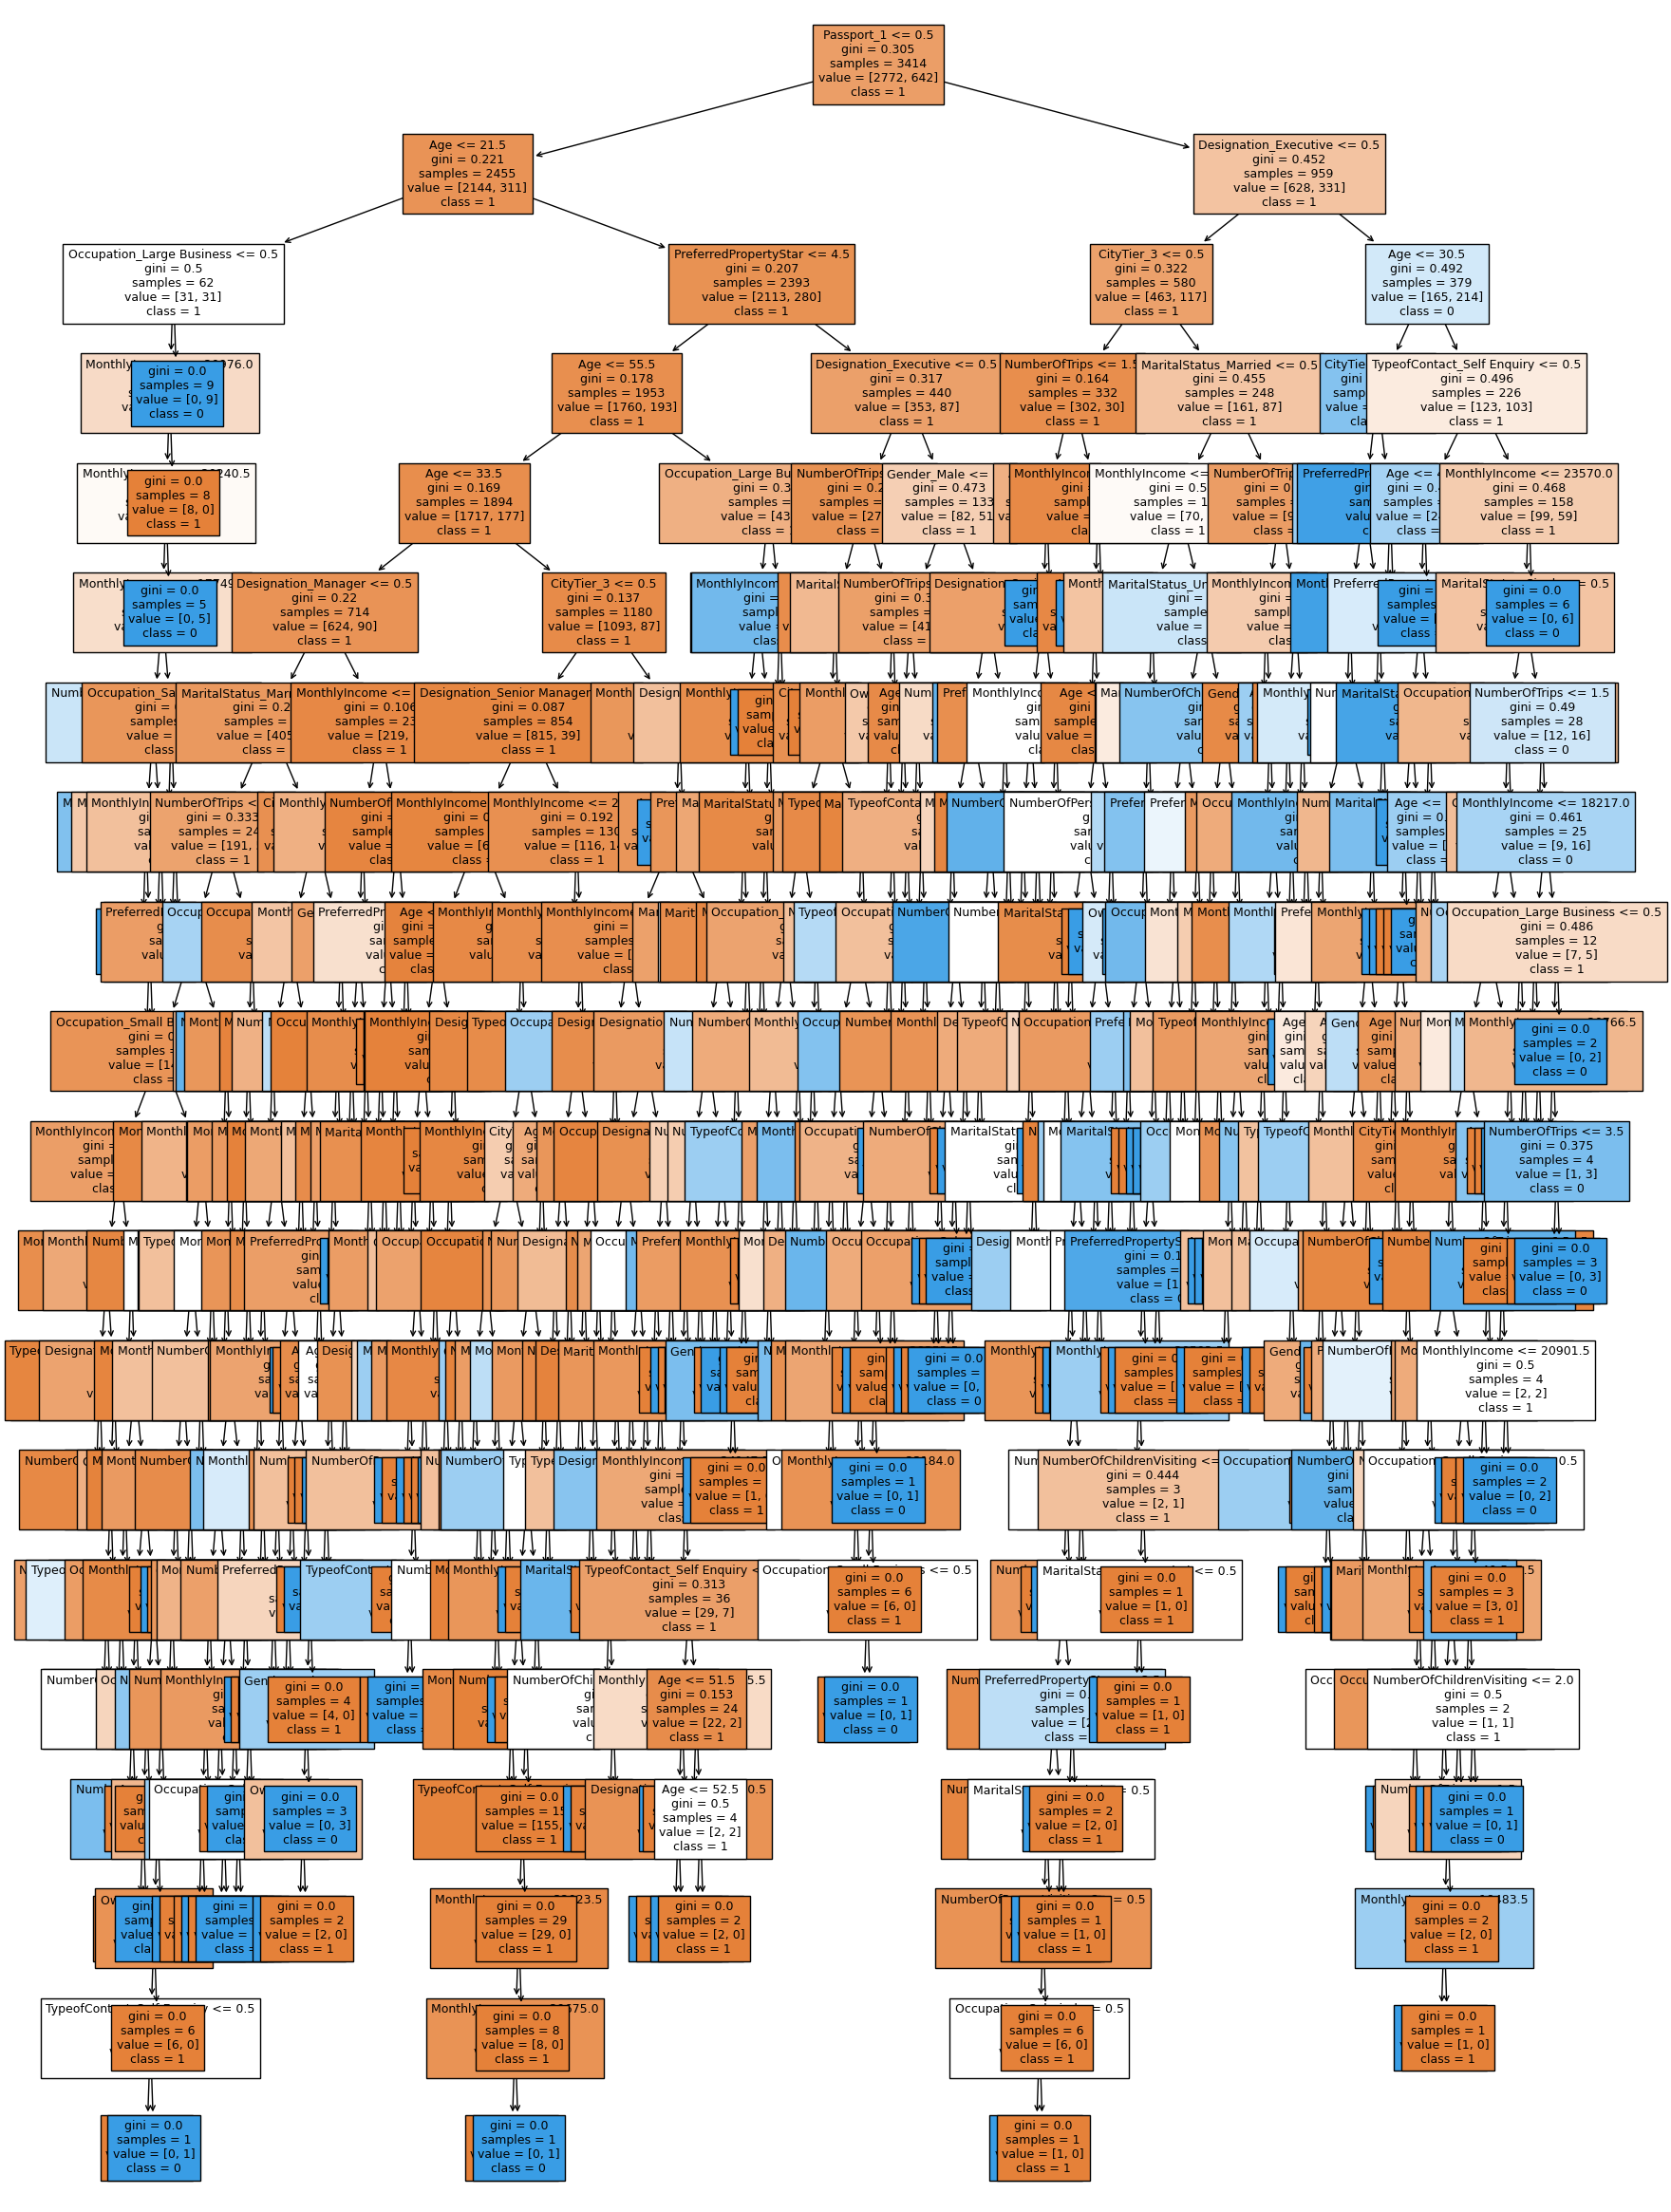

In [49]:

feature_names = X_train.columns
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=['1','0'],
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

- The Decision tree model with default parameters is overfitting the train data.
- The F1 Score is 62% which is considerably low
- The Recall value is around 63% & not convincing enough to proceed ahead with this Model

### Decision Tree Classifier - Hyperparameter Tuning

In [45]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(10,60,10)) + [None], 
              "criterion": ["gini","entropy"],
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=20,
                       random_state=1)

In [46]:
dtree_tuned_model_perf=get_metrics_score(dtree_tuned)

Accuracy on training set :  0.997949619214997
Accuracy on test set :  0.8620218579234973
Recall on training set :  0.9984423676012462
Recall on test set :  0.6231884057971014
Precision on training set :  0.990726429675425
Precision on test set :  0.6370370370370371
F1 Score on training set :  0.9945694336695112
F1 Score on test set :  0.6300366300366301


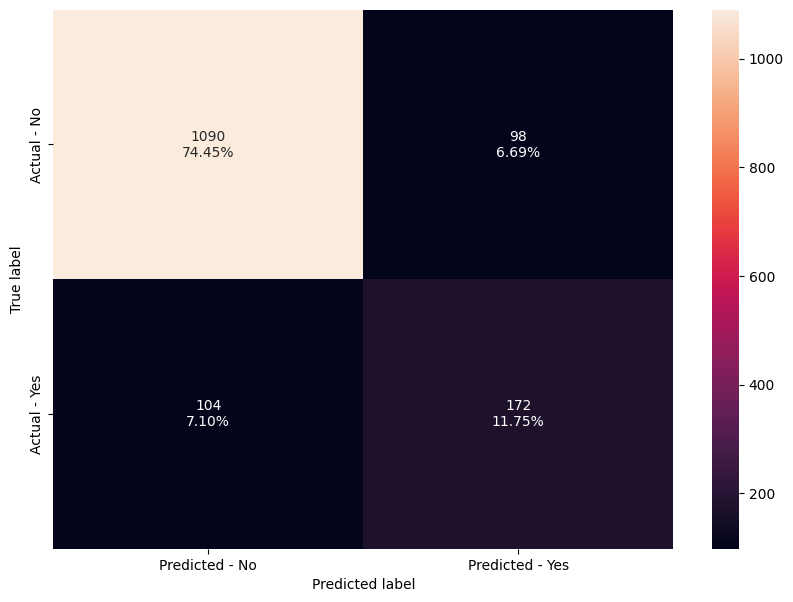

In [47]:
make_confusion_matrix(dtree_tuned,y_test)

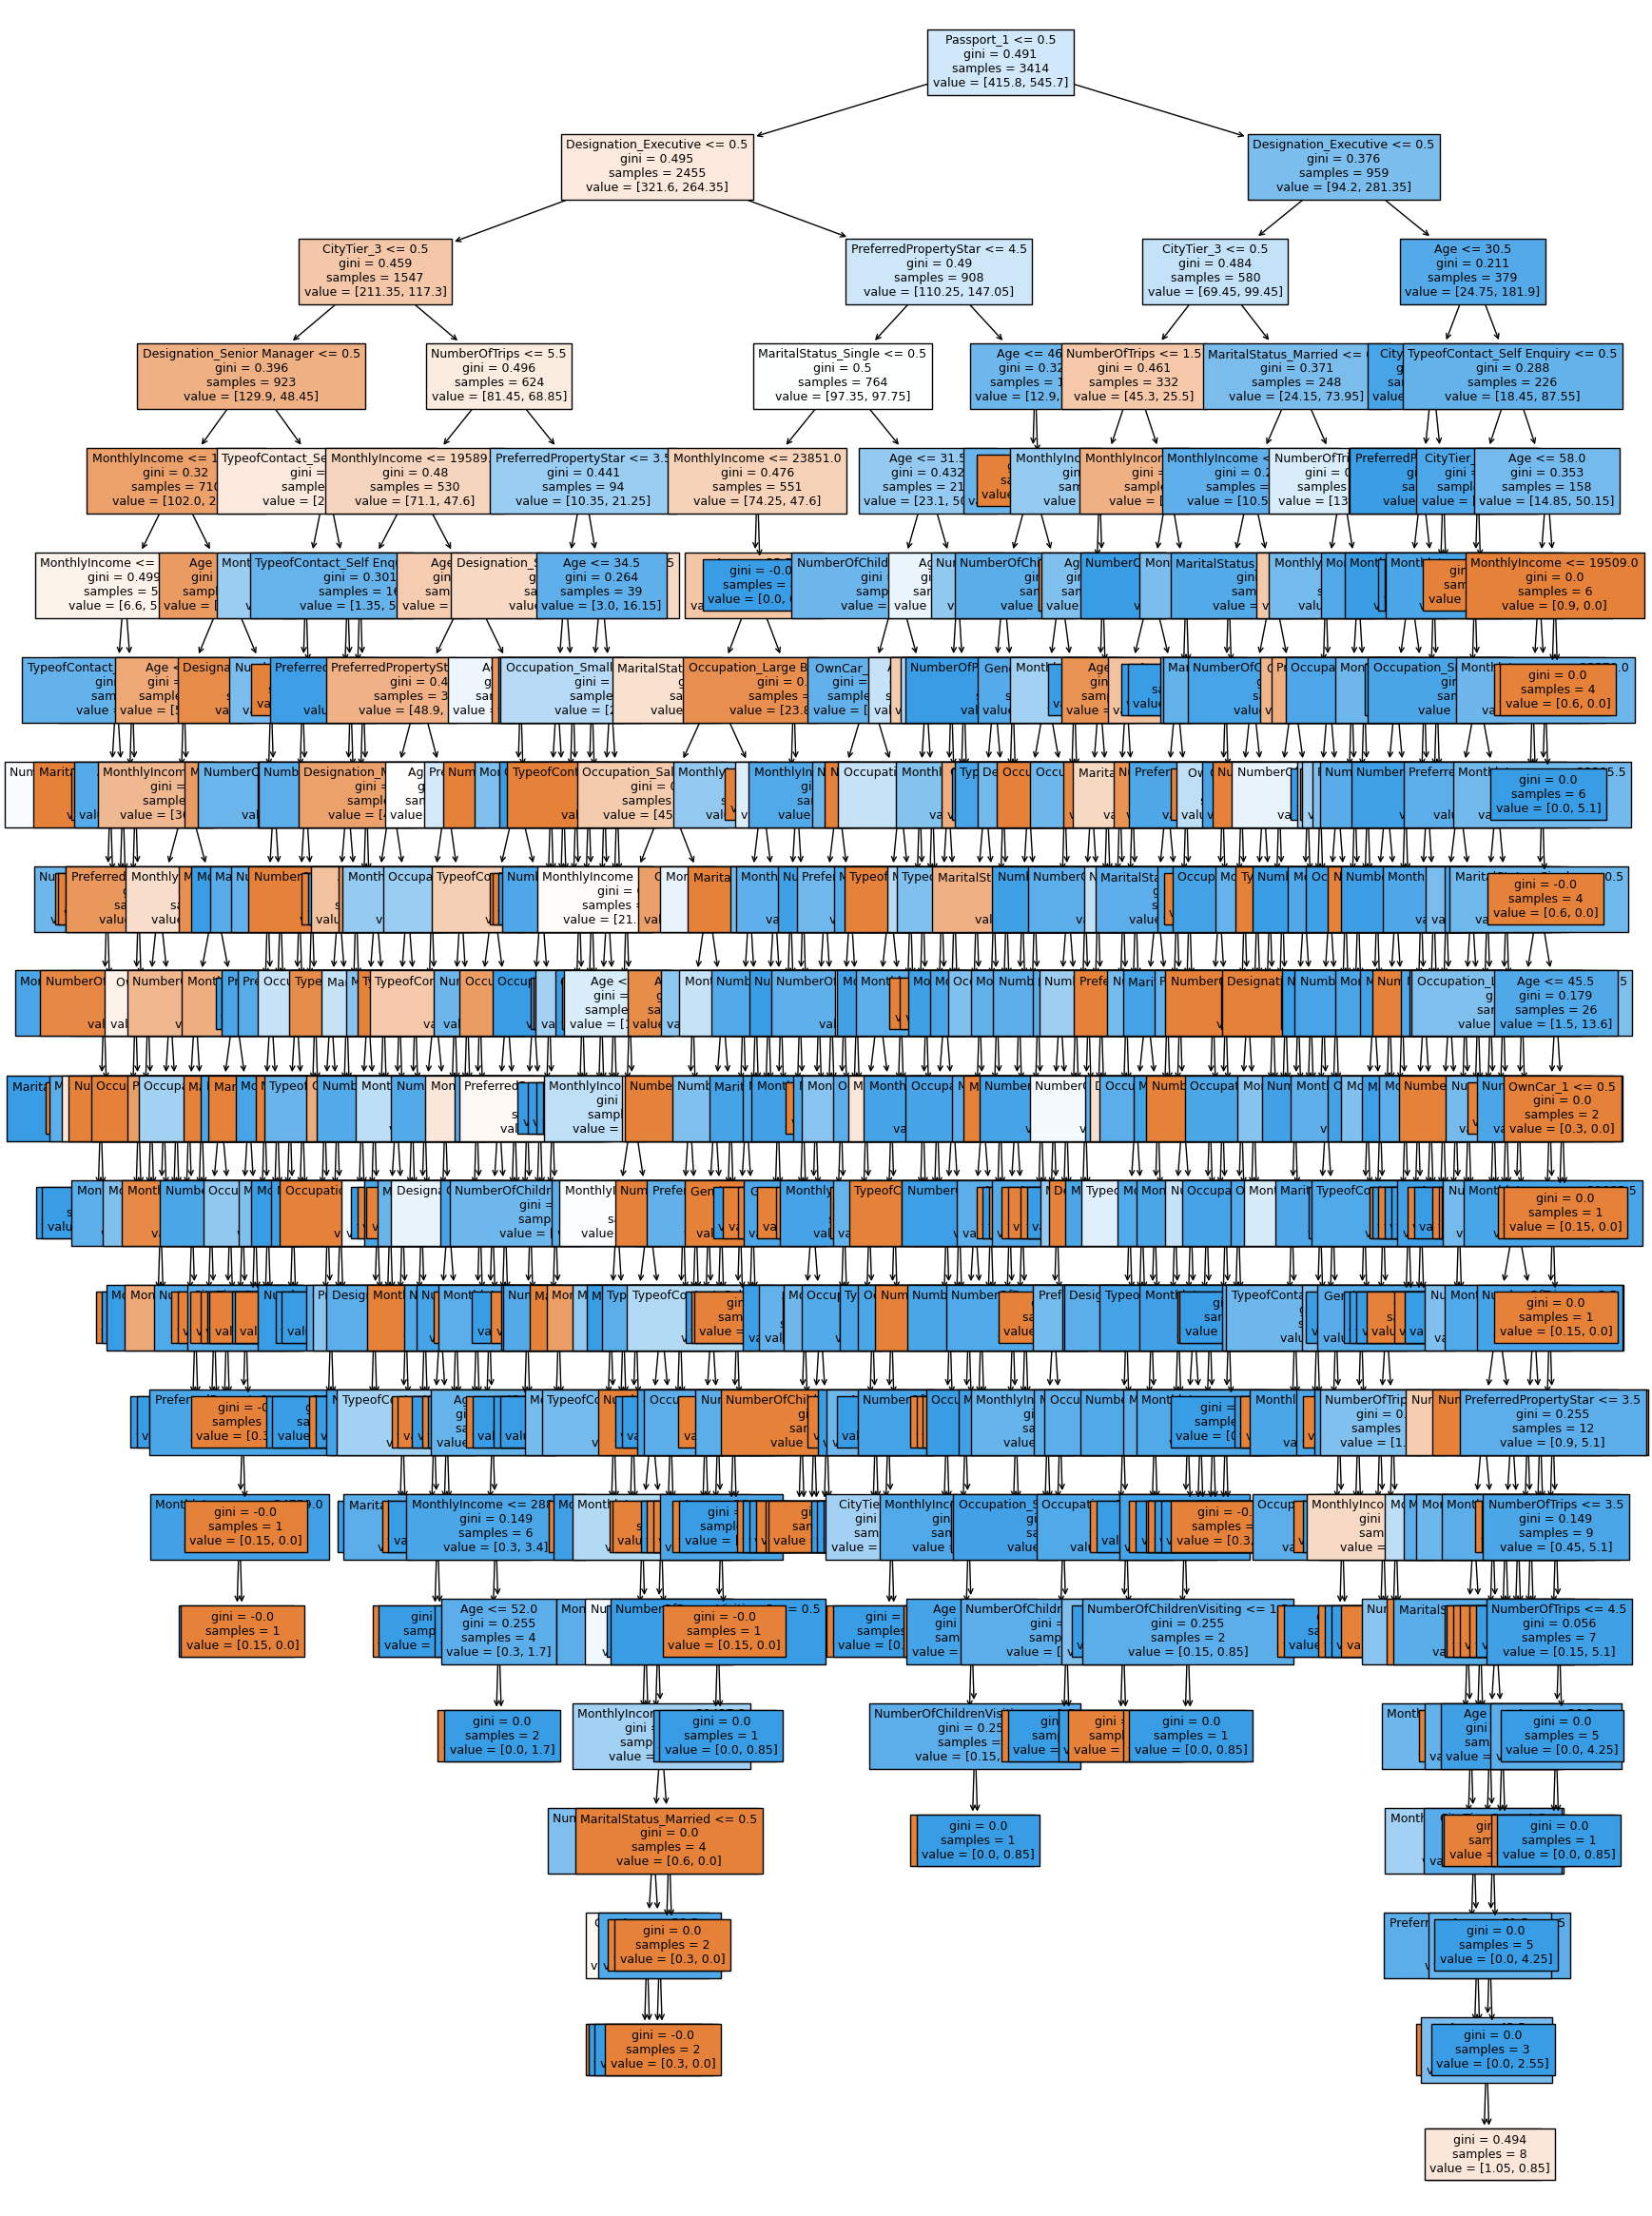

In [50]:
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

**Plotting the feature importance of each variable**

In [51]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
MonthlyIncome               0.196359
Age                         0.195289
Passport_1                  0.086588
NumberOfTrips               0.084495
Designation_Executive       0.061933
PreferredPropertyStar       0.057549
CityTier_3                  0.046143
TypeofContact_Self Enquiry  0.037403
MaritalStatus_Single        0.030310
Occupation_Salaried         0.024263
Occupation_Small Business   0.021685
Gender_Male                 0.021242
NumberOfChildrenVisiting    0.020321
MaritalStatus_Married       0.019223
OwnCar_1                    0.019214
Designation_Senior Manager  0.016882
CityTier_2                  0.014614
MaritalStatus_Unmarried     0.010150
Occupation_Large Business   0.009872
NumberOfPersonVisiting_2    0.007400
NumberOfPersonVisiting_4    0.006617
Designation_Manager         0.006528
NumberOfPersonVisiting_3    0.004073
Designation_VP              0.001847
NumberOfPersonVisiting_5    0.000000


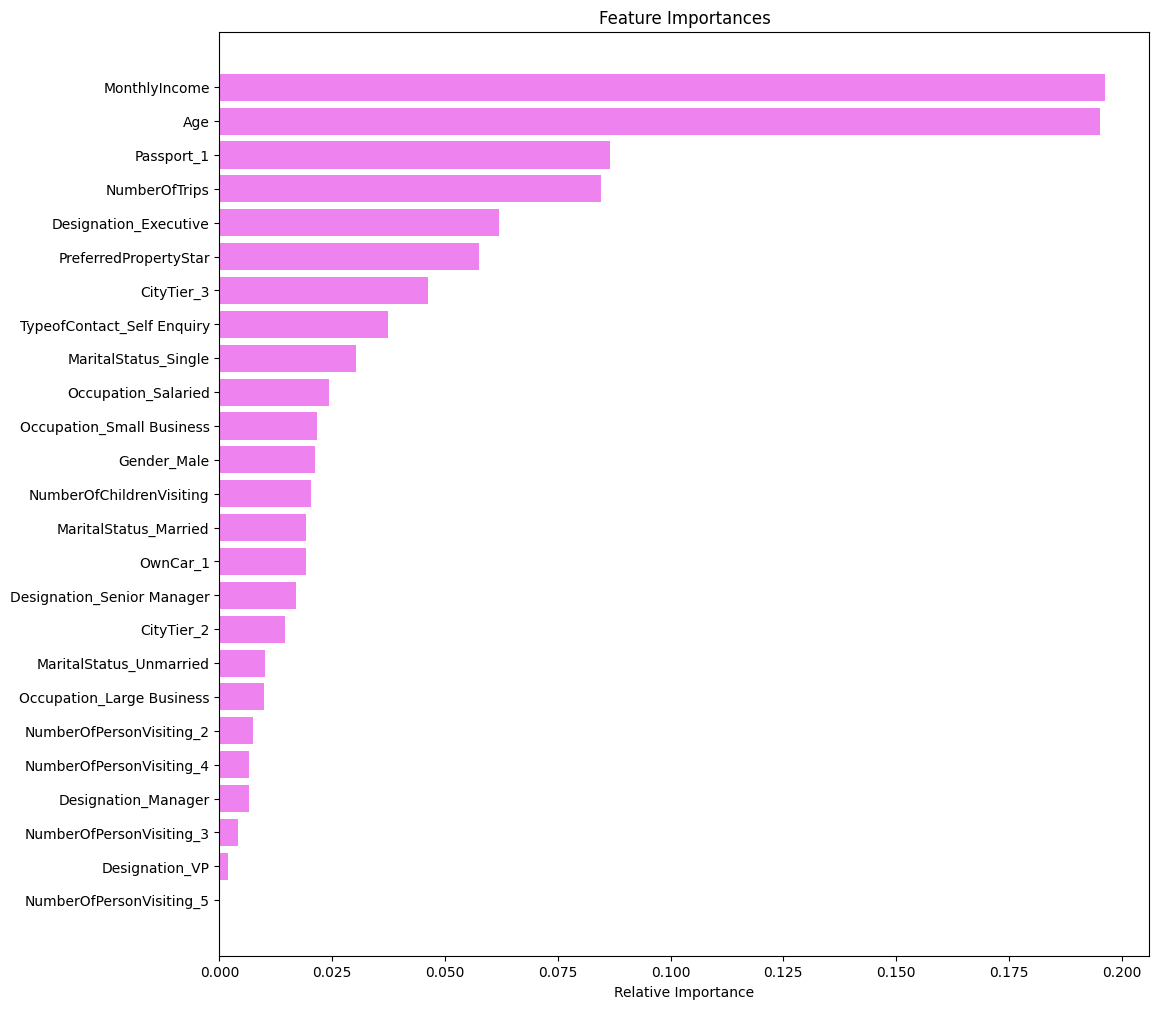

In [52]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income is the most important feature followed by Age and Number of trips
- Passport and Designation plays an important role
- Almost all the other parameters contributed to the model not providing much improvement
- The overfitting is not reduced much after hyperparameter tuning and the F1, recall test score is slightly improved

### Random Forest Model

In [53]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [54]:
rf_estimator_model_perf=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.889344262295082
Recall on training set :  1.0
Recall on test set :  0.4782608695652174
Precision on training set :  1.0
Precision on test set :  0.88
F1 Score on training set :  1.0
F1 Score on test set :  0.619718309859155


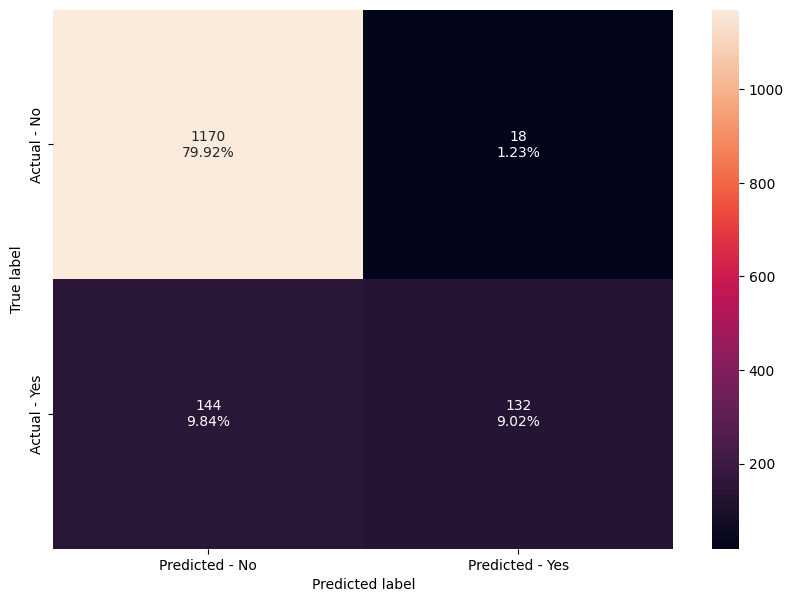

In [55]:
make_confusion_matrix(rf_estimator,y_test)

- Random forest also overfits the data and needs tuning to reduce it.
- F1 score is around 62% and recall is low

### Random Forest - Hyperparameter Tuning

In [56]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1,class_weight={0:0.15,1:0.85})

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': np.arange(110,251,501),
                'min_samples_leaf': np.arange(1,6,1),
                "max_samples": np.arange(0.3, 0.7, None),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=10,
                       max_features=None, max_samples=0.3, min_samples_leaf=5,
                       n_estimators=110, random_state=1)

In [57]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
MonthlyIncome               0.178760
Age                         0.154781
Passport_1                  0.117664
Designation_Executive       0.082400
NumberOfTrips               0.068509
CityTier_3                  0.059147
PreferredPropertyStar       0.055408
MaritalStatus_Single        0.032860
MaritalStatus_Married       0.031370
NumberOfChildrenVisiting    0.028735
Gender_Male                 0.023175
TypeofContact_Self Enquiry  0.019838
OwnCar_1                    0.018311
Designation_Senior Manager  0.017950
Occupation_Small Business   0.017766
Occupation_Salaried         0.016791
Designation_Manager         0.015342
NumberOfPersonVisiting_4    0.012237
NumberOfPersonVisiting_3    0.011274
NumberOfPersonVisiting_2    0.011098
MaritalStatus_Unmarried     0.010991
Occupation_Large Business   0.010289
CityTier_2                  0.004548
Designation_VP              0.000755
NumberOfPersonVisiting_5    0.000000


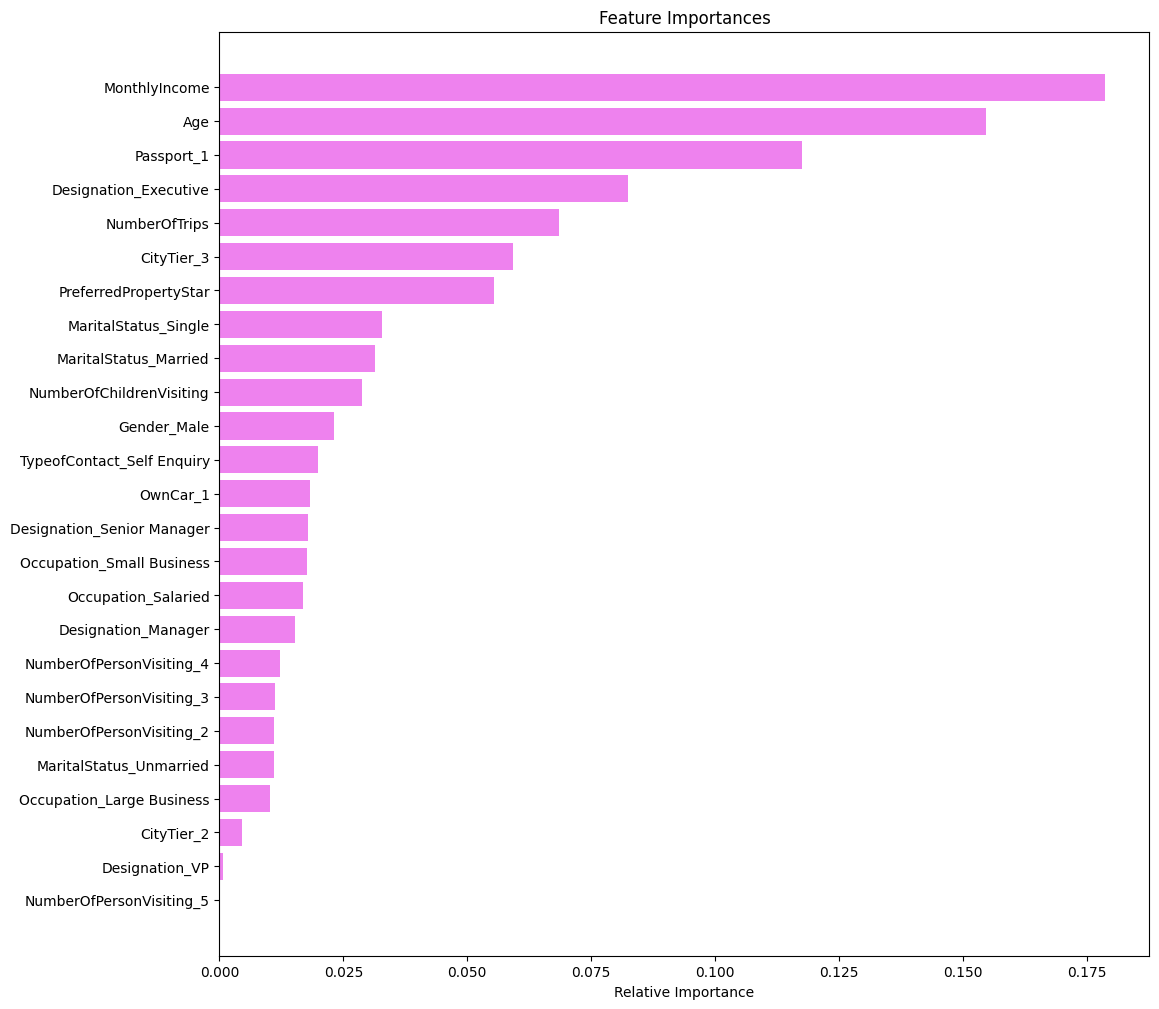

In [58]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [59]:
#Calculating different metrics
rf_estimator_tuned_model_perf=get_metrics_score(rf_tuned)

Accuracy on training set :  0.8749267721148213
Accuracy on test set :  0.8299180327868853
Recall on training set :  0.6962616822429907
Recall on test set :  0.605072463768116
Precision on training set :  0.658321060382916
Precision on test set :  0.5439739413680782
F1 Score on training set :  0.6767600302800908
F1 Score on test set :  0.5728987993138938


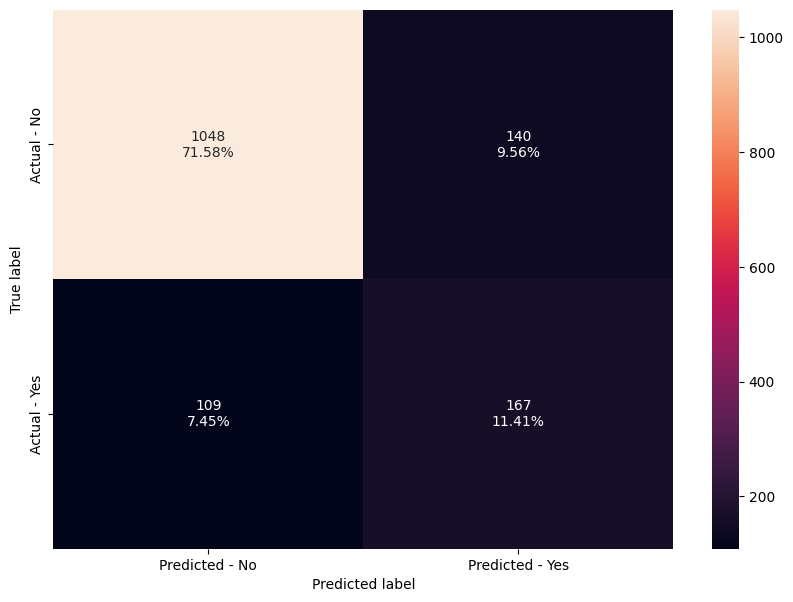

In [60]:
make_confusion_matrix(rf_tuned,y_test)

- Monthly Income is the most important feature, followed by Designation and Number of trips
- No significant change in the result. The result is almost the same before or after the hyperparameter tuning.
- The model is not generalized yet and still it overfits
- F1 score is reduced however the Recall is still low

### Bagging Classifier

In [61]:
# baggingClassifier
bagging_classifier = BaggingClassifier(random_state=1)

# fit the model on training dataset
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [62]:
# check the scores on Training and Testing Datasets
bgc_score = get_metrics_score(bagging_classifier)

Accuracy on training set :  0.9882835383714118
Accuracy on test set :  0.8859289617486339
Recall on training set :  0.940809968847352
Recall on test set :  0.5144927536231884
Precision on training set :  0.9966996699669967
Precision on test set :  0.8114285714285714
F1 Score on training set :  0.9679487179487178
F1 Score on test set :  0.6297117516629711


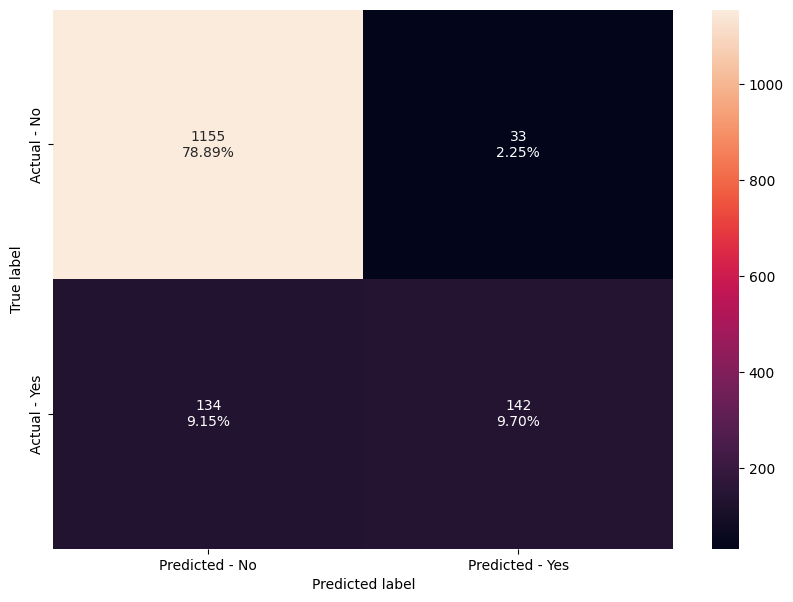

In [63]:
make_confusion_matrix(bagging_classifier,y_test)

- The model is over fitting.
- The Bagging classifier has a better accuracy metric and the F1 score is also higher.
- Model only predicts 9.7% of the total 12% of positives.

## Bagging Classifier With Decision Tree

In [64]:
# BaggingClassifier with gini and class_weight for appropriate importance
bgc_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1),random_state=1)

# fit the model on training set
bgc_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=1),
                  random_state=1)

In [65]:
bgcdt_score = get_metrics_score(bgc_dt)

Accuracy on training set :  0.9888693614528412
Accuracy on test set :  0.8743169398907104
Recall on training set :  0.9439252336448598
Recall on test set :  0.4492753623188406
Precision on training set :  0.9967105263157895
Precision on test set :  0.7948717948717948
F1 Score on training set :  0.9695999999999999
F1 Score on test set :  0.574074074074074


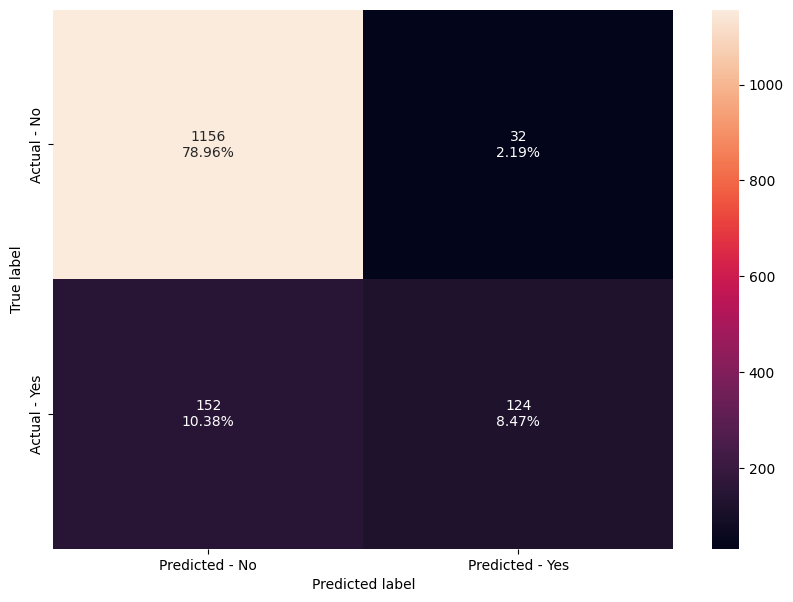

In [66]:
make_confusion_matrix(bgc_dt,y_test)

- The model with weighted decision tree hasn"t improved the metrics.
- The true positive"s identified are even lesser
- F1 score is reduced and recall is poor

## Bagging Classifier - Hyperparameter tuning

In [67]:
# set the parameters
parameters = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

# assigning Bootstrap = True to select features with Replacement
bgc1 = BaggingClassifier(random_state=1,bootstrap=True)

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(bgc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
bgcht = grid_obj.best_estimator_

# fit the best algorithm to the data.
bgcht.fit(X_train, y_train)


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [68]:
bgcht_score = get_metrics_score(bgcht)

Accuracy on training set :  0.9997070884592852
Accuracy on test set :  0.89275956284153
Recall on training set :  0.9984423676012462
Recall on test set :  0.5072463768115942
Precision on training set :  1.0
Precision on test set :  0.8695652173913043
F1 Score on training set :  0.9992205767731879
F1 Score on test set :  0.6407322654462243


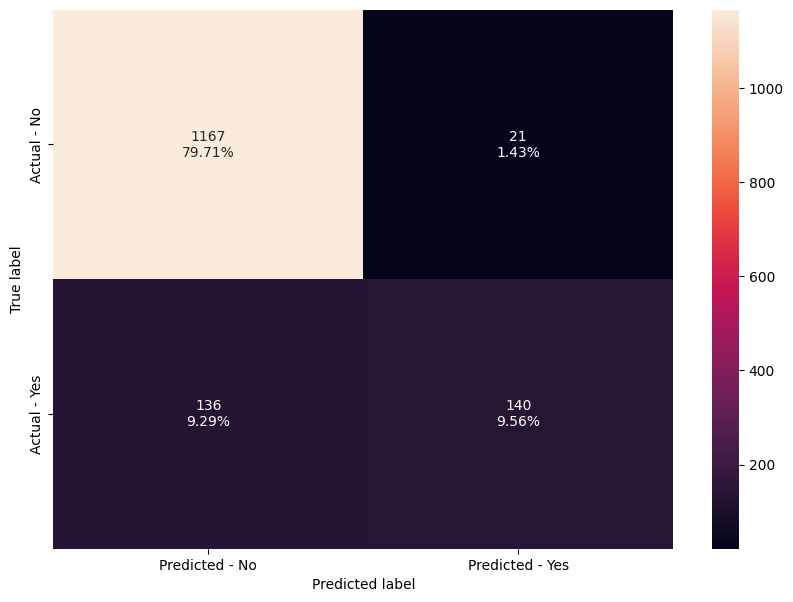

In [69]:
make_confusion_matrix(bgcht,y_test)

- The Train and Test Accuracy and F1Score Performance has increased after tuning compared to the previous models.
- The Model is over-fitting as the difference between Train and Test scores are very high.
- The Model mostly identifies all non-buyers better as the False Positive value is low.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [70]:
ab_Classifier=AdaBoostClassifier(random_state=1)
ab_Classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [71]:
ab_classifier_score=get_metrics_score(ab_Classifier)

Accuracy on training set :  0.8427065026362038
Accuracy on test set :  0.8435792349726776
Recall on training set :  0.29439252336448596
Recall on test set :  0.286231884057971
Precision on training set :  0.6923076923076923
Precision on test set :  0.7117117117117117
F1 Score on training set :  0.4131147540983606
F1 Score on test set :  0.4082687338501292


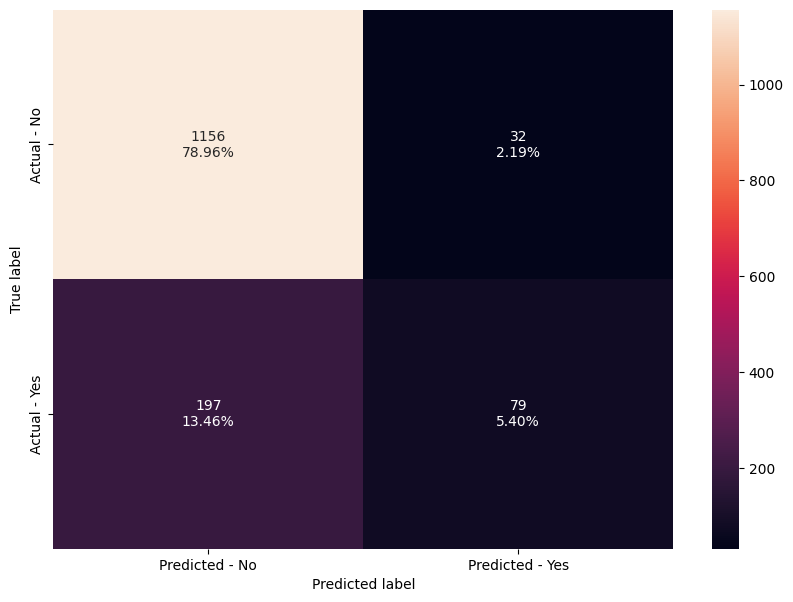

In [72]:
make_confusion_matrix(ab_Classifier,y_test)

- AdaBoost  is giving poor performance, in terms of metrics score, as compared to the decision tree and random forest model.  

### Adaboost Classifier - Hyperparameter Tuning

In [73]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
              "base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=1),DecisionTreeClassifier(max_depth=2,random_state=1),
                      DecisionTreeClassifier(max_depth=3,random_state=1)],
              'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [74]:
ab_tuned_classifier_score=get_metrics_score(ab_tuned)

Accuracy on training set :  0.9651435266549502
Accuracy on test set :  0.8367486338797814
Recall on training set :  0.8613707165109035
Recall on test set :  0.4384057971014493
Precision on training set :  0.9485420240137221
Precision on test set :  0.5902439024390244
F1 Score on training set :  0.9028571428571429
F1 Score on test set :  0.503118503118503


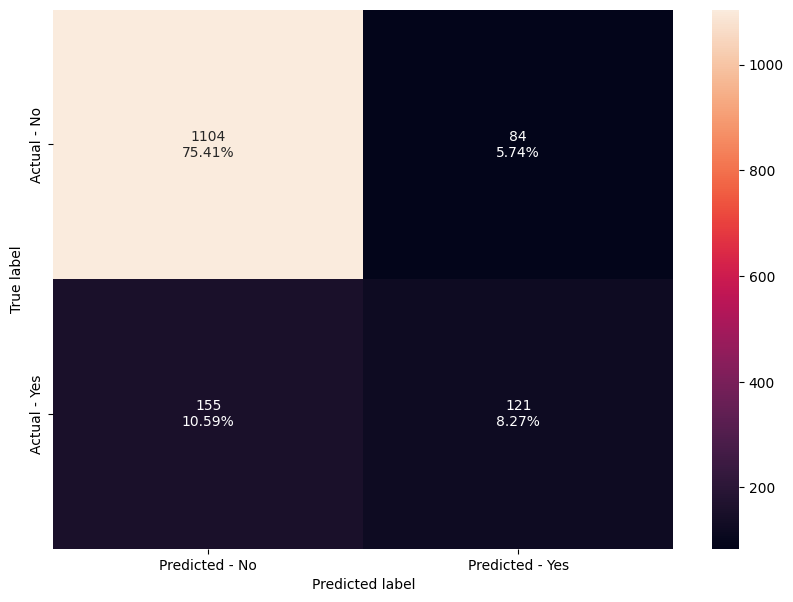

In [75]:
make_confusion_matrix(ab_tuned,y_test)

- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [76]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
MonthlyIncome               0.458006
Age                         0.148775
NumberOfTrips               0.058559
PreferredPropertyStar       0.039890
Gender_Male                 0.032700
CityTier_3                  0.026406
Passport_1                  0.024563
TypeofContact_Self Enquiry  0.022094
Occupation_Large Business   0.021684
MaritalStatus_Single        0.019671
Designation_Senior Manager  0.017846
NumberOfPersonVisiting_3    0.015082
Designation_Manager         0.013833
CityTier_2                  0.012884
NumberOfPersonVisiting_2    0.011968
Occupation_Small Business   0.011691
NumberOfChildrenVisiting    0.011246
MaritalStatus_Married       0.010745
Designation_Executive       0.010637
MaritalStatus_Unmarried     0.008271
OwnCar_1                    0.006643
NumberOfPersonVisiting_4    0.005714
Occupation_Salaried         0.005693
Designation_VP              0.005400
NumberOfPersonVisiting_5    0.000000


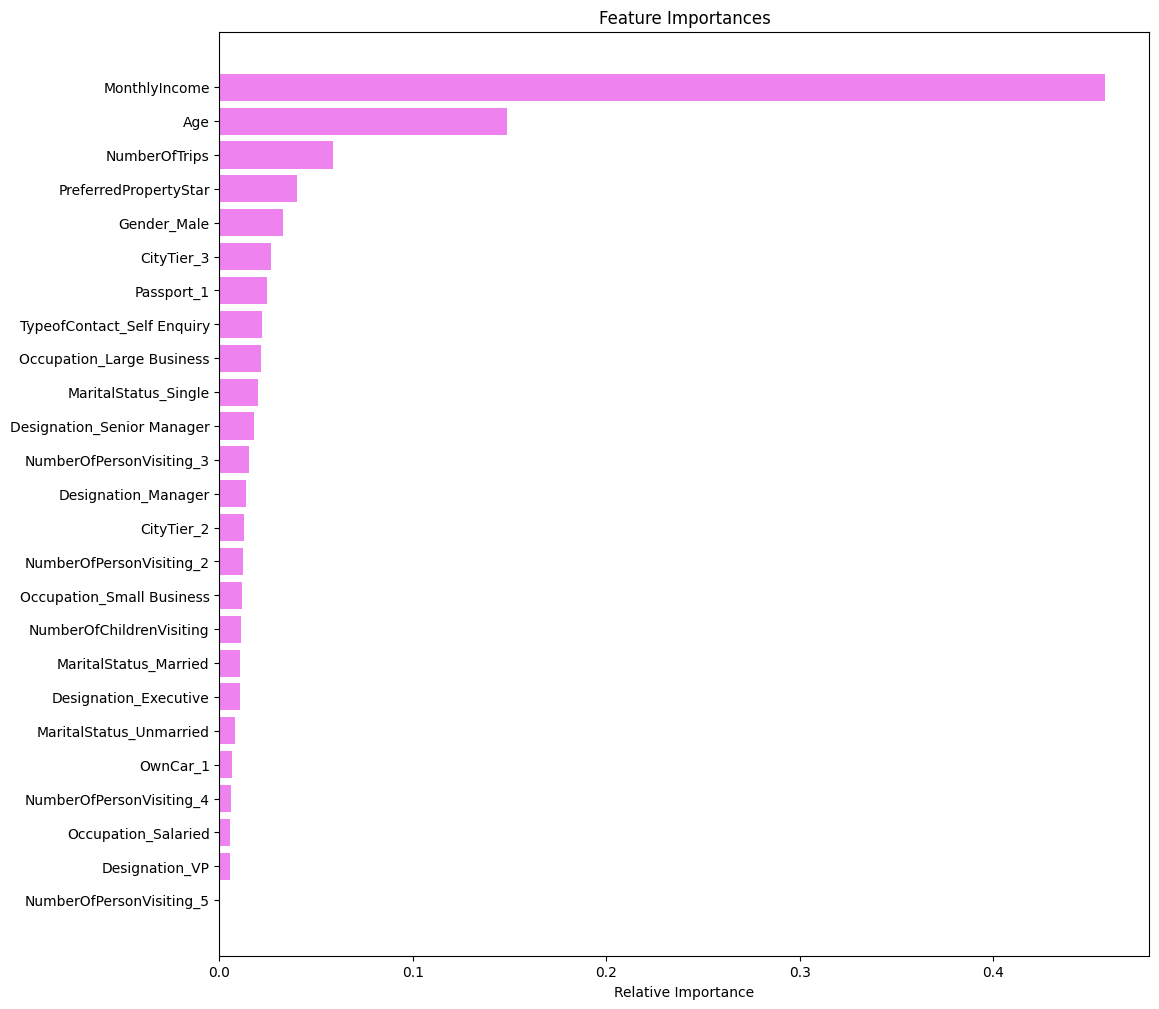

In [77]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly income is the most important feature
- All the metrics score are relatively poor

### Gradient Boosting Classifier

In [78]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [79]:
gb_classsifier_score=get_metrics_score(gb_estimator)

Accuracy on training set :  0.8807850029291154
Accuracy on test set :  0.8620218579234973
Recall on training set :  0.4485981308411215
Recall on test set :  0.37318840579710144
Precision on training set :  0.844574780058651
Precision on test set :  0.7803030303030303
F1 Score on training set :  0.5859613428280773
F1 Score on test set :  0.5049019607843137


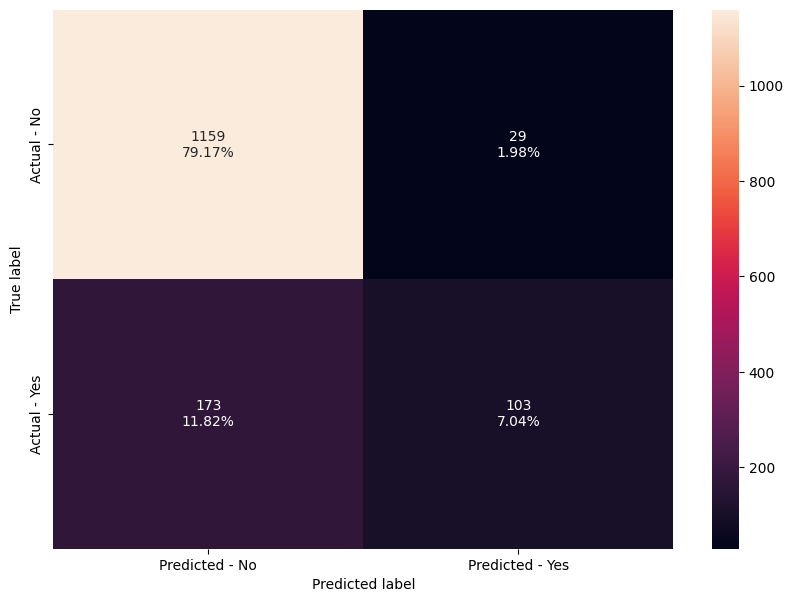

In [80]:
make_confusion_matrix(gb_estimator,y_test)

- Gradient boosting is not performing well and the metrics scores both F1 and Recall are very low compared to other models

In [81]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
MonthlyIncome               0.186460
Passport_1                  0.167246
Designation_Executive       0.153909
Age                         0.128787
CityTier_3                  0.065791
MaritalStatus_Single        0.051824
PreferredPropertyStar       0.050960
NumberOfTrips               0.040990
Designation_Senior Manager  0.022816
MaritalStatus_Unmarried     0.020969
MaritalStatus_Married       0.019103
Occupation_Large Business   0.017114
TypeofContact_Self Enquiry  0.014515
Designation_Manager         0.012870
Gender_Male                 0.009807
Occupation_Small Business   0.008556
CityTier_2                  0.008083
NumberOfChildrenVisiting    0.006847
NumberOfPersonVisiting_4    0.004305
Occupation_Salaried         0.003647
NumberOfPersonVisiting_3    0.002907
OwnCar_1                    0.001103
NumberOfPersonVisiting_2    0.001070
Designation_VP              0.000321
NumberOfPersonVisiting_5    0.000000


### Gradient Boosting Classifier - Hyperparameter Tuning

In [82]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, max_features=0.8, n_estimators=175,
                           random_state=1, subsample=0.9)

In [83]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
MonthlyIncome               0.282319
Age                         0.160916
Passport_1                  0.079050
NumberOfTrips               0.072592
Designation_Executive       0.064096
PreferredPropertyStar       0.049152
CityTier_3                  0.038202
Gender_Male                 0.026933
MaritalStatus_Single        0.025179
TypeofContact_Self Enquiry  0.024940
NumberOfChildrenVisiting    0.020667
MaritalStatus_Unmarried     0.019320
Occupation_Large Business   0.017635
Designation_Manager         0.015362
Occupation_Small Business   0.014726
MaritalStatus_Married       0.013858
OwnCar_1                    0.012689
NumberOfPersonVisiting_2    0.012624
Designation_Senior Manager  0.012553
Occupation_Salaried         0.011307
NumberOfPersonVisiting_4    0.008404
NumberOfPersonVisiting_3    0.007115
CityTier_2                  0.006614
Designation_VP              0.003708
NumberOfPersonVisiting_5    0.000036


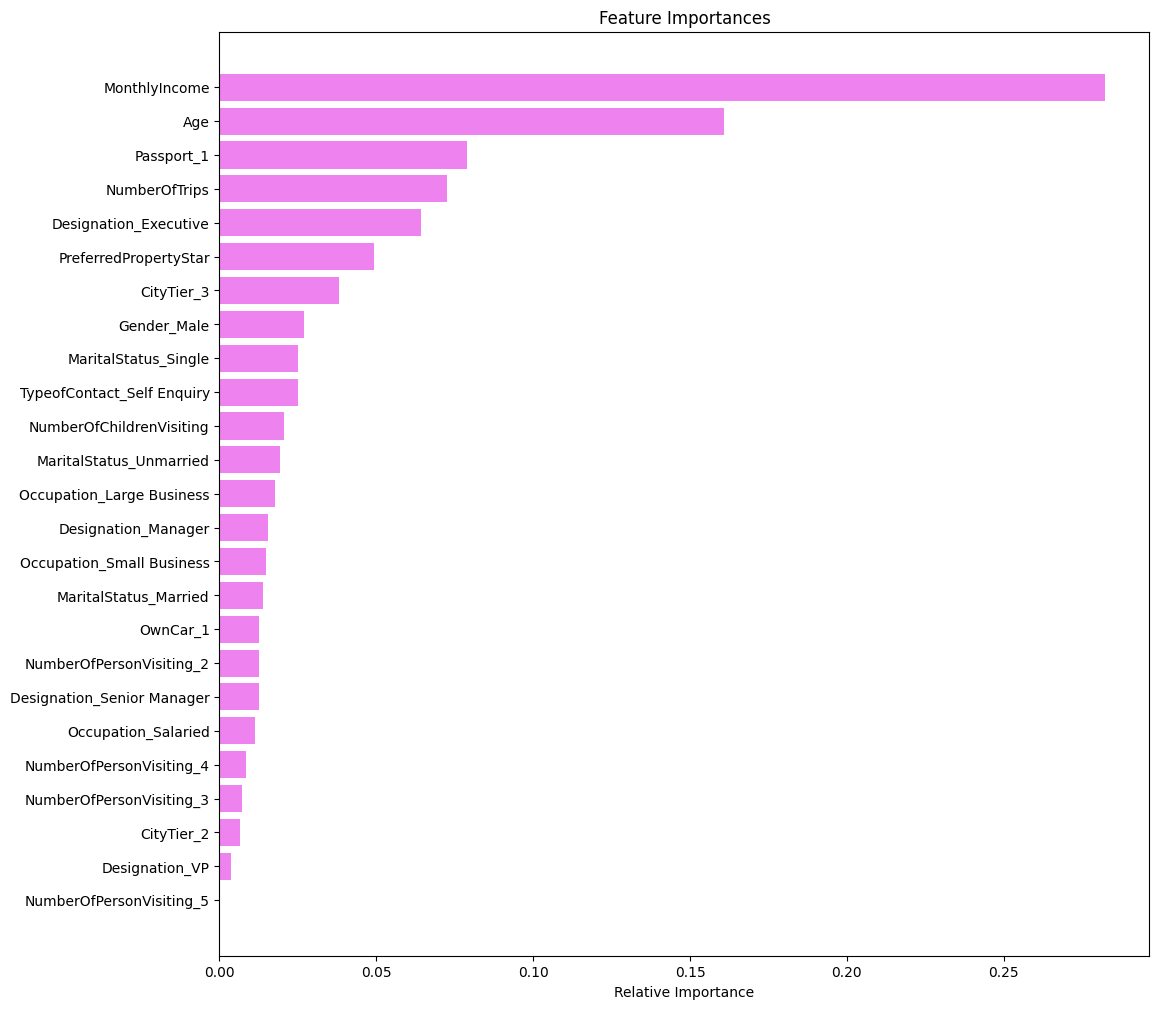

In [84]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [85]:
gbm_tuned_classifier_score=get_metrics_score(gb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.907103825136612
Recall on training set :  1.0
Recall on test set :  0.5978260869565217
Precision on training set :  1.0
Precision on test set :  0.868421052631579
F1 Score on training set :  1.0
F1 Score on test set :  0.7081545064377682


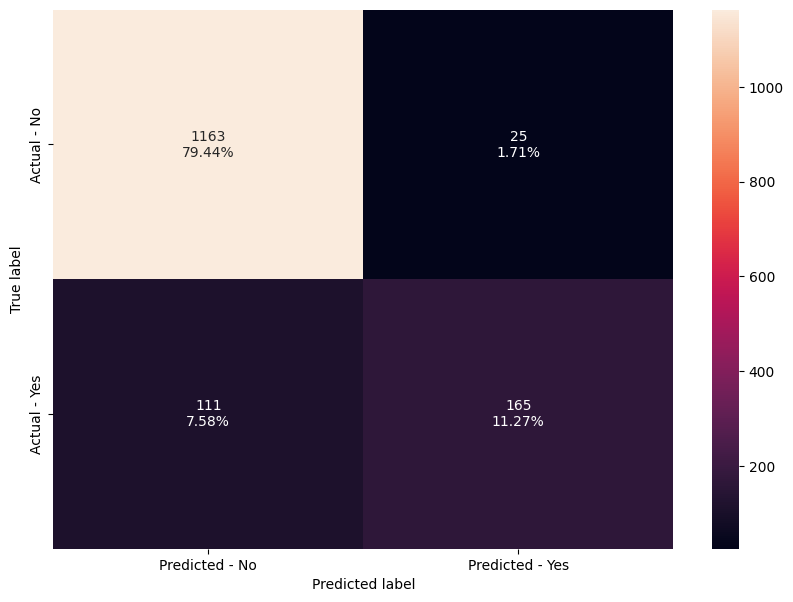

In [86]:
make_confusion_matrix(gb_tuned,y_test)

- Gradient Boosting with Hyper Parameter Tuning march towards generalizing the model as the scores improved a lot for F1 score . This indicates the chances of predicting false positive and false negative are relatively low. F1 score improved a lot in this model 
- Income, Age and Passport are the driving factors

### XGBoost Classifier

In [87]:
xgb_estimator=XGBClassifier(random_state=1, eval_metric='logloss')
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [88]:
XGBClassifier_score=get_metrics_score(xgb_estimator)

Accuracy on training set :  0.9956063268892794
Accuracy on test set :  0.8941256830601093
Recall on training set :  0.9766355140186916
Recall on test set :  0.5615942028985508
Precision on training set :  1.0
Precision on test set :  0.8201058201058201
F1 Score on training set :  0.988179669030733
F1 Score on test set :  0.6666666666666667


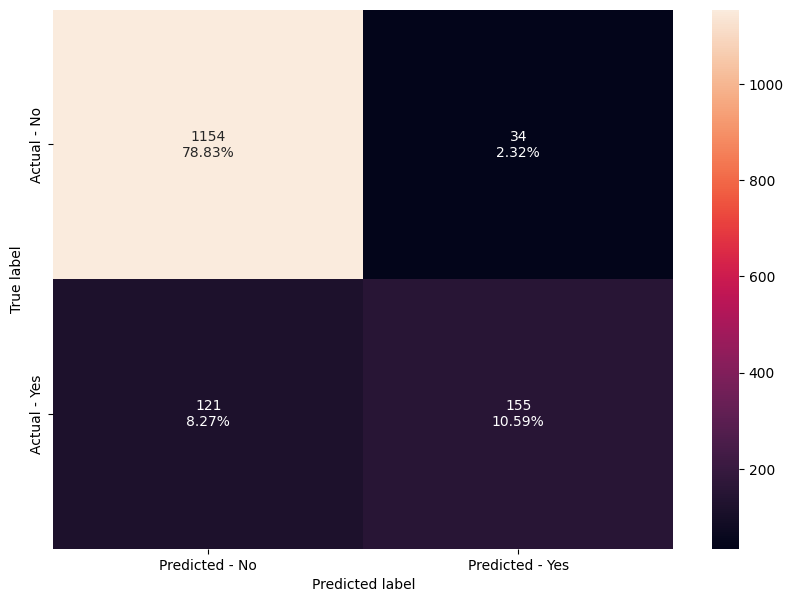

In [89]:
make_confusion_matrix(xgb_estimator,y_test)

- XGBoost with default parameters is having better results compared to other models built apart from gradient boosting with Hyper Parameters
- The metrics ( F1 score, Recall) are considerably better than the other models

### XGBoost Classifier - Hyperparameter Tuning

In [90]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

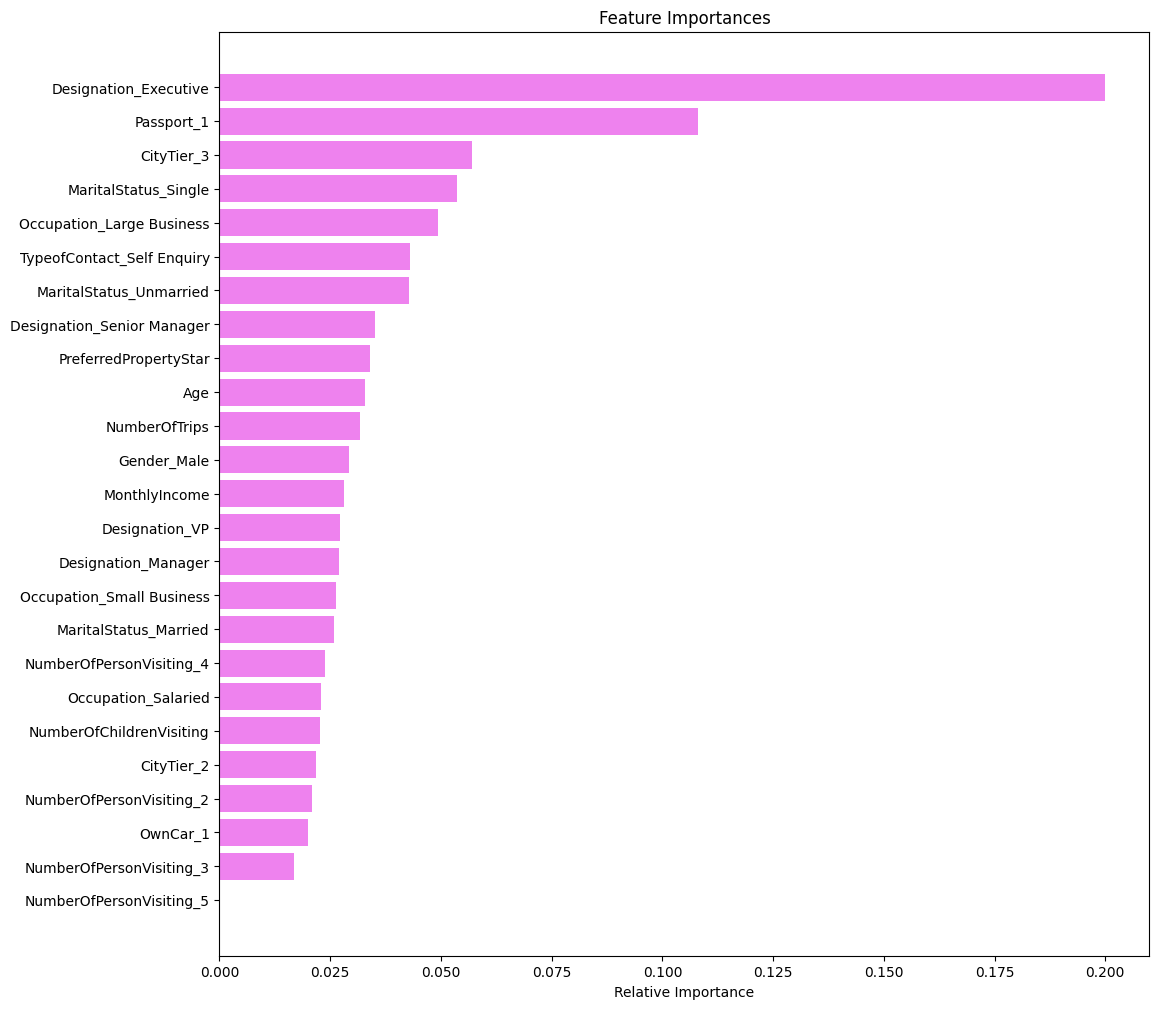

In [91]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [93]:
xgb_tuned_classifier_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9991212653778558
Accuracy on test set :  0.8961748633879781
Recall on training set :  0.9953271028037384
Recall on test set :  0.5797101449275363
Precision on training set :  1.0
Precision on test set :  0.8163265306122449
F1 Score on training set :  0.9976580796252927
F1 Score on test set :  0.6779661016949153


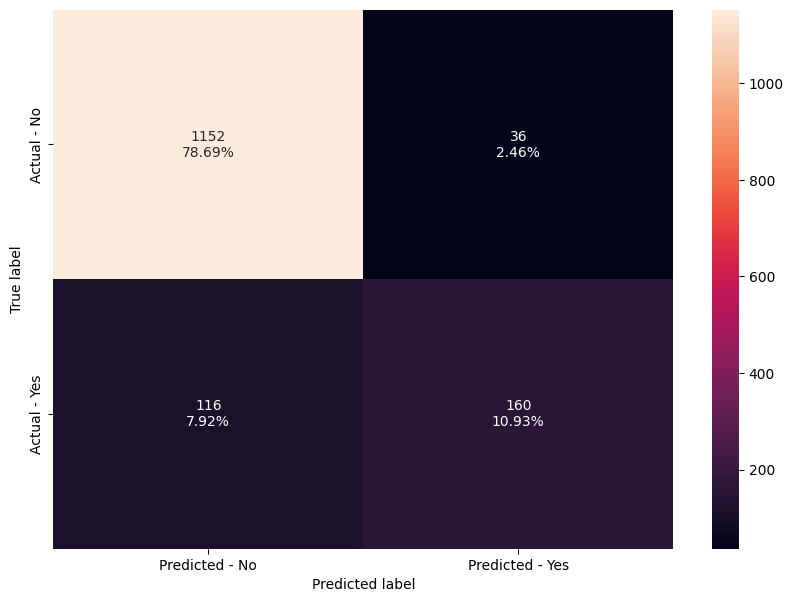

In [94]:
make_confusion_matrix(xgb_tuned,y_test)

- In XGBoost, Designation and Passport status proves to be a driving factor for the prediction.
- The Metrics score (F1 score & Recall) are better

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [95]:
estimators=[('Decision Tree', dtree),('Bagging Classifier', bagging_classifier)]
final_estimator=RandomForestClassifier(random_state=1)

In [96]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Bagging Classifier',
                                BaggingClassifier(random_state=1))],
                   final_estimator=RandomForestClassifier(random_state=1))

In [97]:
stacking_classifier_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9988283538371412
Accuracy on test set :  0.8920765027322405
Recall on training set :  0.9968847352024922
Recall on test set :  0.6413043478260869
Precision on training set :  0.9968847352024922
Precision on test set :  0.75
F1 Score on training set :  0.9968847352024922
F1 Score on test set :  0.69140625


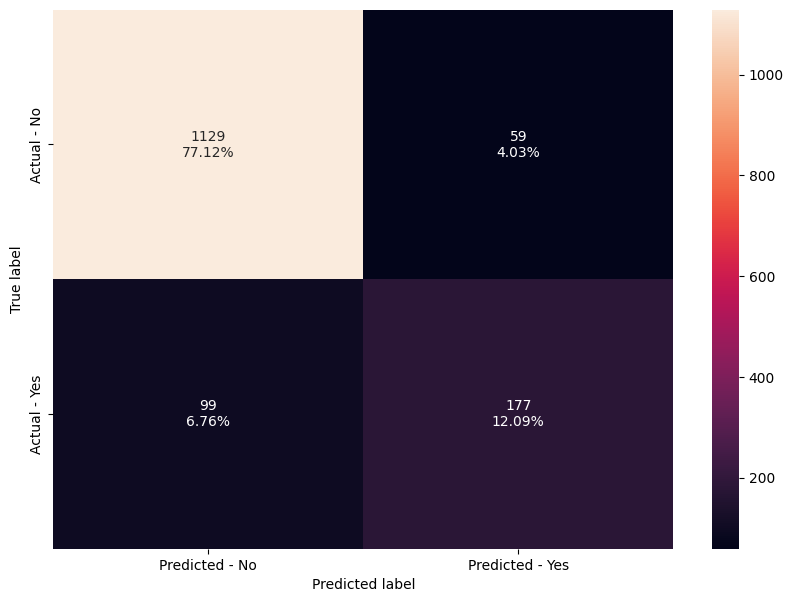

In [98]:
make_confusion_matrix(stacking_estimator,y_test)

In [99]:
estimators=[('AB Classifier', ab_Classifier),('Gradient Boosting Classifier', gb_estimator)]
final_estimator=XGBClassifier(random_state=1)

In [100]:
stacking_estimator_boosting=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator_boosting.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AB Classifier',
                                AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting Classifier',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

In [101]:
stacking_classifier_score1=get_metrics_score(stacking_estimator_boosting)

Accuracy on training set :  0.8646748681898067
Accuracy on test set :  0.8490437158469946
Recall on training set :  0.48286604361370716
Recall on test set :  0.427536231884058
Precision on training set :  0.7045454545454546
Precision on test set :  0.6519337016574586
F1 Score on training set :  0.5730129390018485
F1 Score on test set :  0.5164113785557987


- The Stacking classifier with estimators as Decision tree and Bagging classifier performed better than any other models
- F1 Score is approx 70% and fairly a better model. Recall score is also better compared to other models
- The stacking classifier with initial estimators as boosting algorithm fares poorly and hence cannot be taken forward

## Comparing all models

In [104]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, bagging_classifier, bgc_dt,bgcht, ab_Classifier, ab_tuned, gb_estimator,gb_tuned, xgb_estimator, xgb_tuned,stacking_estimator,stacking_estimator_boosting]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_scorefinal_train = []
f1_scorefinal_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_scorefinal_train.append(np.round(j[6],2))
    f1_scorefinal_test.append(np.round(j[7],2))

In [107]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree', 'Decision Tree with HyperParameterTuning', 'Random Forest', 'Random Forest-HyperParameterTuning', 'Bagging Classifier', 'Bagging Classifier-DT','Bagging Classifier-Tuned', 'AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','Stacking with Bagging Algo','Stacking with Boosting Algo'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1Score': f1_scorefinal_train,'Test_F1Score':f1_scorefinal_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0                               Decision Tree            1.00           0.86   
1     Decision Tree with HyperParameterTuning            1.00           0.86   
2                               Random Forest            1.00           0.89   
3          Random Forest-HyperParameterTuning            0.87           0.83   
4                          Bagging Classifier            0.99           0.89   
5                       Bagging Classifier-DT            0.99           0.87   
6                    Bagging Classifier-Tuned            1.00           0.89   
7             AdaBoost with default paramters            0.84           0.84   
8                              AdaBoost Tuned            0.97           0.84   
9   Gradient Boosting with default parameters            0.88           0.86   
10                    Gradient Boosting Tuned            1.00           0.91   
11            XGBoost with default parameters            1.00           0.89   
12                              XGBoost Tuned            1.00           0.90   
13                 Stacking with Bagging Algo            1.00           0.89   
14                Stacking with Boosting Algo            0.86           0.85   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1Score  \
0           1.00         0.64             1.00            0.62           1.00   
1           1.00         0.62             0.99            0.64           0.99   
2           1.00         0.48             1.00            0.88           1.00   
3           0.70         0.61             0.66            0.54           0.68   
4           0.94         0.51             1.00            0.81           0.97   
5           0.94         0.45             1.00            0.79           0.97   
6           1.00         0.51             1.00            0.87           1.00   
7           0.29         0.29             0.69            0.71           0.41   
8           0.86         0.44             0.95            0.59           0.90   
9           0.45         0.37             0.84            0.78           0.59   
10          1.00         0.60             1.00            0.87           1.00   
11          0.98         0.56             1.00            0.82           0.99   
12          1.00         0.58             1.00            0.82           1.00   
13          1.00         0.64             1.00            0.75           1.00   
14          0.48         0.43             0.70            0.65           0.57   

    Test_F1Score  
0           0.63  
1           0.63  
2           0.62  
3           0.57  
4           0.63  
5           0.57  
6           0.64  
7           0.41  
8           0.50  
9           0.50  
10          0.71  
11          0.67  
12          0.68  
13          0.69  
14          0.52

- The tuned gradient boosting model is the best model here. It has the highest F1 score of approx 71% and a good recall score on the Test data.
- Gradient boosting tuned with Hyper Parameters, XGBoost, and stacking with Bagging algorithms as initial estimators are the top 3 models. They are all giving almost similar performance.

## Conclusions

- Basic and Deluxe are the most popular packages.
- There was lot of imbalance in data, as only 18% of customers bought any product. This created challenge in building the model for analysis. More sample points needed for the model.
- The attributes such as NumberofChilden and NumberofPeoplevisiting does not significantly impact the performance of model.
- With the available model, the company can run for identifying future customers and propagate the new offerings.
- Young and single people are more likely to buy the offered packages and it is evident from the analysis.
- Age and Income have a correlation and we see that higher age groups and higher Monthly Income groups lean towards the expensive packages. However, the other parameters plays an important role in deriving the buy factor of the packages
- Customers tend to buy packages when the sales team contacted them , have multiple followups, a good sales pitch and the basic package is a hit.
- Company invited customers opted for packages which indicates marketing is the key
- Large Business owners have higher chance of purchasing the travel package

 ## Business Recommendations

- Identification of individual packages to the specific business designation
- Campaigns and offers to attract the customers with more accompanying persons and single person.
- The WELLNESS TOURISM PACKAGE should be customized according to the age groups.
- The new offering to be promoted with a womens only version to attract the female customers
- Customer contact events to be organised (fairs/promotional events) to interact with customers and marketing the packages
- Innovative ways of marketing with personalised offers for the existing customers to upgrade for the new package
- The company can run various campaigns and offers for customers with family to increase sales.
- The data shows customers with passport has higher buying ratio and target wellness package with international travel option.
- Promote the free Passport application facility for the customers who buy the packages and not having passport. 
- Specific packages can be created for different income groups.
- More details to be collected for freelancers community
- Remote working options to be included in wellness package to attract more salried customers

------------ THE END ---------------